In [1]:
import numpy as np # to extract fast Fourier transform
import statistics as st
import matplotlib.pyplot as plt # to plot the magnitude spectrums
import os
import librosa # to load audio file
import IPython.display as ipd # to listen to audio files directly in Jupyter notebook
import scipy.stats as ss

In [2]:
## create a base directory
BASE_DIR = r"C:\Users\annik\OneDrive\Documents\S2024\phys267\project\audio files"

## audio files *a full octave from f to f
f = ['f1.wav', 'f2.wav', 'f3.wav', 'f4.wav', 'f5.wav']
fsharp = ['fsharp1.wav', 'fsharp2.wav', 'fsharp3.wav', 'fsharp4.wav', 'fsharp5.wav']
g = ['g1.wav', 'g2.wav', 'g3.wav', 'g4.wav', 'g5.wav']
gsharp = ['gsharp1.wav', 'gsharp2.wav', 'gsharp3.wav', 'gsharp4.wav', 'gsharp5.wav']
a = ['a1.wav', 'a2.wav', 'a3.wav', 'a4.wav', 'a5.wav']
asharp = ['asharp1.wav', 'asharp2.wav', 'asharp3.wav', 'asharp4.wav', 'asharp5.wav']
b = ['b1.wav', 'b2.wav', 'b3.wav', 'b4.wav', 'b5.wav']
c = ['c1.wav', 'c2.wav', 'c3.wav', 'c4.wav', 'c5.wav']
csharp = ['csharp1.wav', 'csharp2.wav', 'csharp3.wav', 'csharp4.wav', 'csharp5.wav']
d = ['d1.wav', 'd2.wav', 'd3.wav', 'd4.wav', 'd5.wav']
dsharp = ['dsharp1.wav', 'dsharp2.wav', 'dsharp3.wav', 'dsharp4.wav', 'dsharp5.wav']
e = ['e1.wav', 'e2.wav', 'e3.wav', 'e4.wav', 'e5.wav']
f2 = ['highf1.wav', 'highf2.wav', 'highf3.wav', 'highf4.wav', 'highf5.wav']

In [3]:
def plot_ffreq(file:str, f_ratio=1):
    
    """Plot magnitude spectrum for audio files of a single note.
    'file' is a list containing multiple (in our case, 5) audio files of a single note."""
    
    ## create list to append fundamental frequencies
    fundamental_frequencies = []
    
    for filename in file: # go through each of the audio files
        
        ## load files as numpy arrays using librosa
        signal, sr = librosa.load(os.path.join(BASE_DIR, filename)) #sr: sample rate in Hz
        ## compute Fourier Transform
        ft = np.fft.fft(signal, n=100000)
        magnitude_spectrum = np.abs(ft)

        ## plot magnitude spectrum
        frequency = np.linspace(0, sr, len(magnitude_spectrum))
        num_freq_bins = int(len(frequency)*f_ratio)
        plt.figure(figsize=(18,5))
        plt.plot(frequency[:num_freq_bins], magnitude_spectrum[:num_freq_bins])
        plt.xlabel("Frequency (Hz)"); plt.ylabel("Magnitude spectrum")
        plt.title(filename)
        plt.show()
    
        ## get fundamental frequency/1st harmonic
        max_magnitude = max(magnitude_spectrum[:num_freq_bins])
        for i, val in enumerate(magnitude_spectrum[:num_freq_bins]):
            if val == max_magnitude:
                max_freq = frequency[i]
        fundamental_frequencies.append(max_freq)

    return fundamental_frequencies

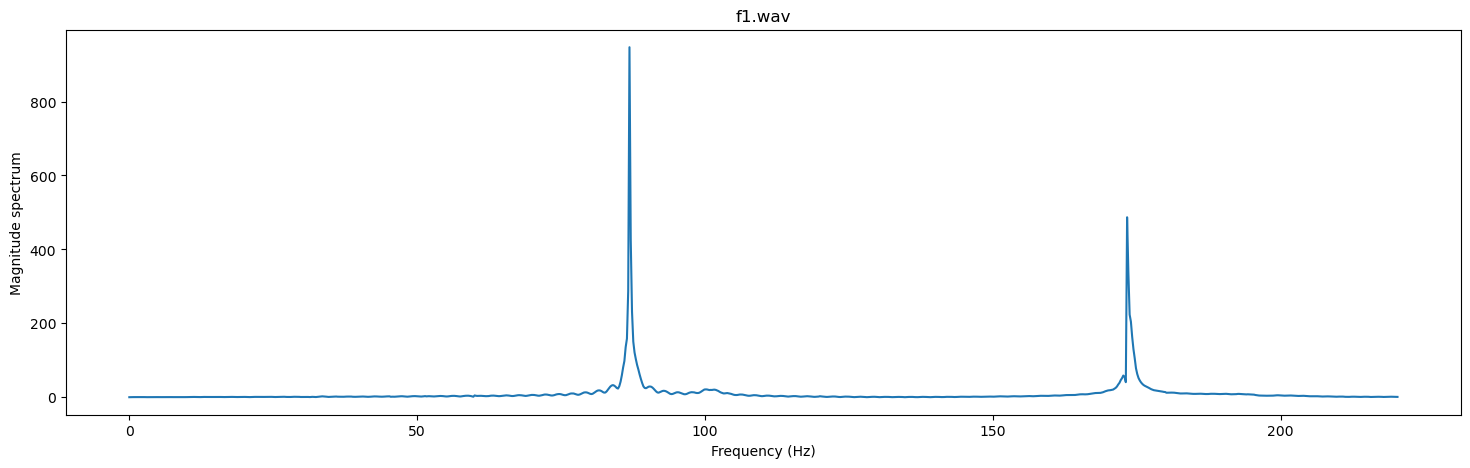

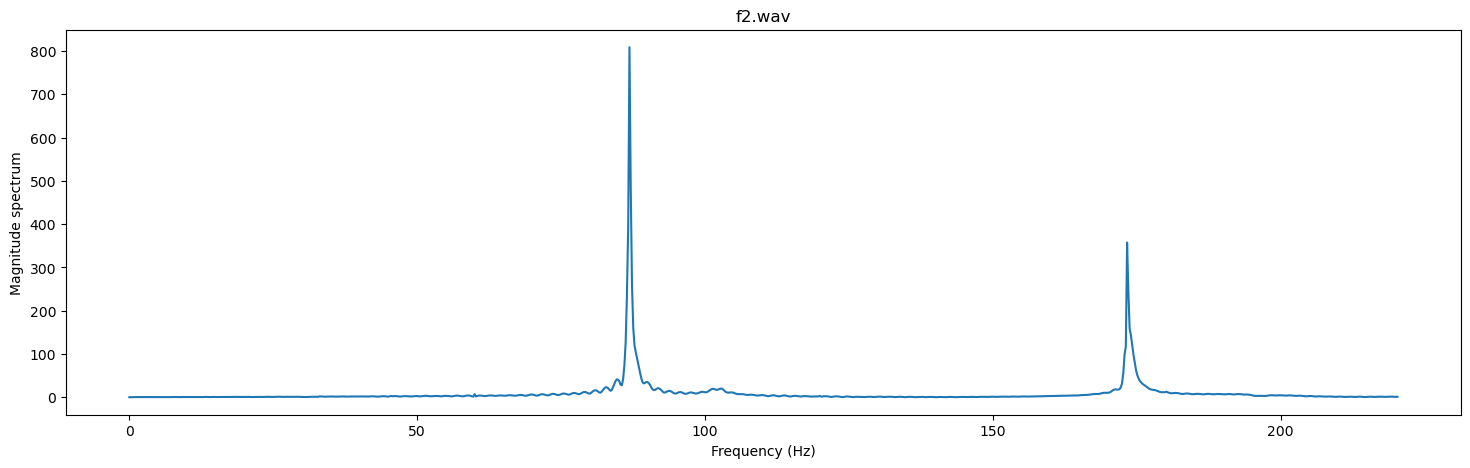

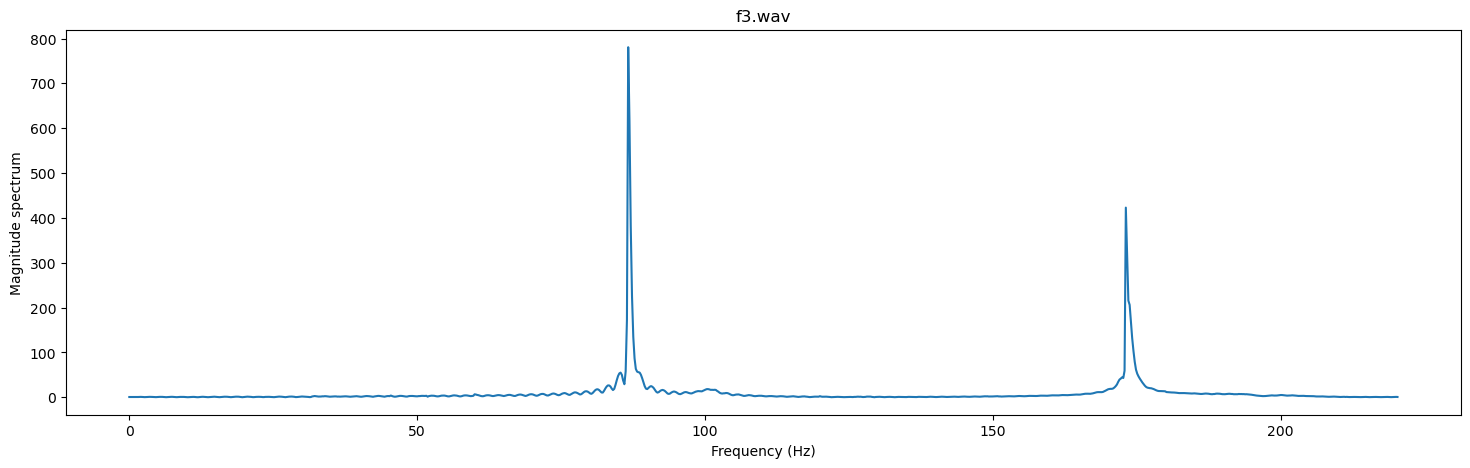

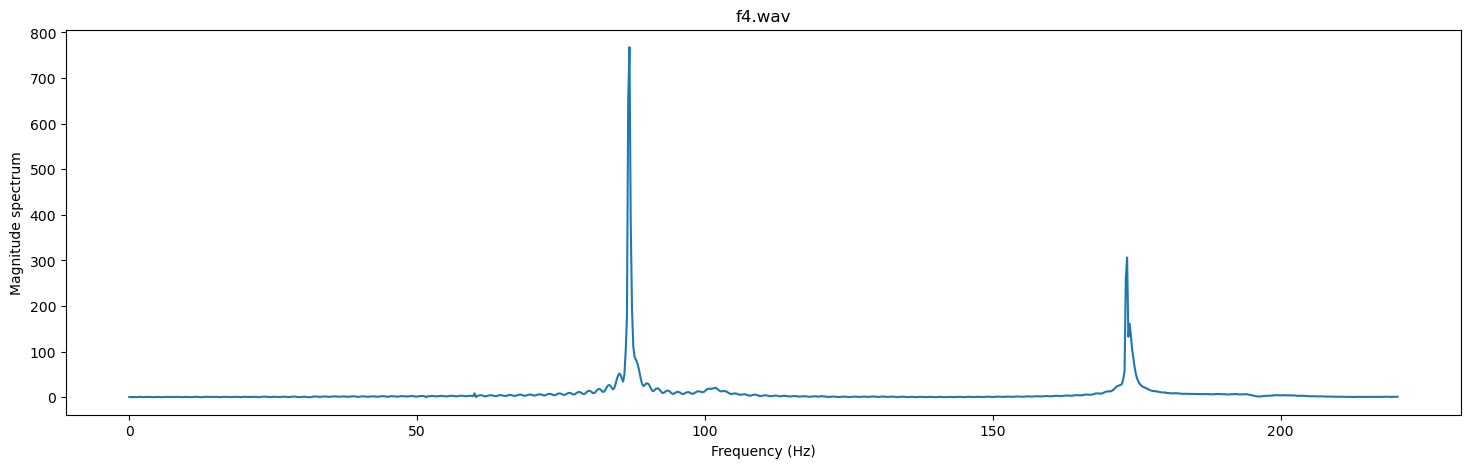

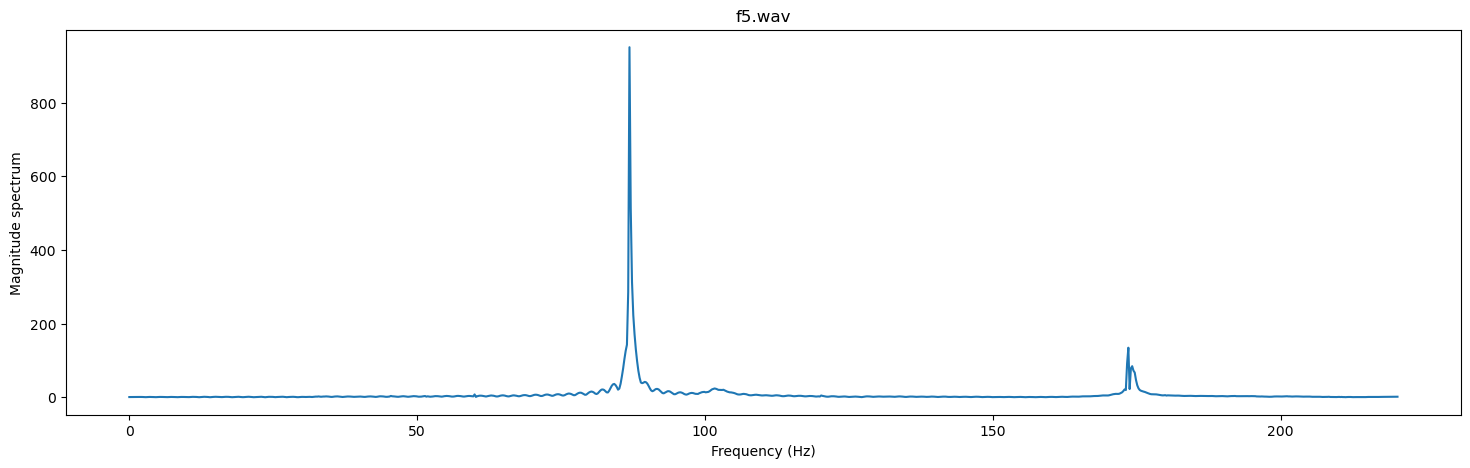

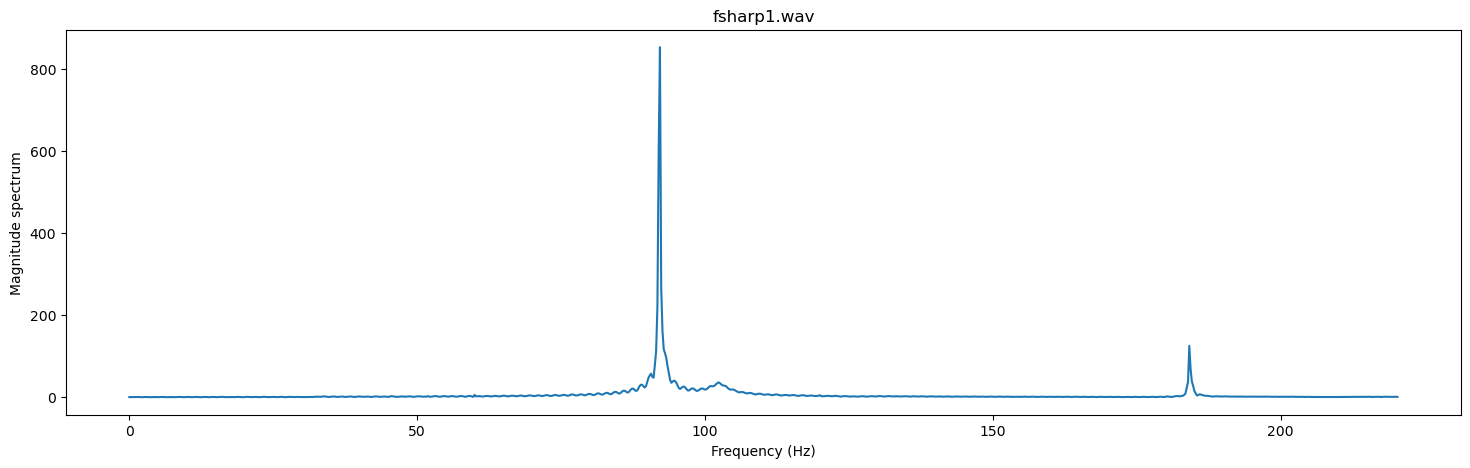

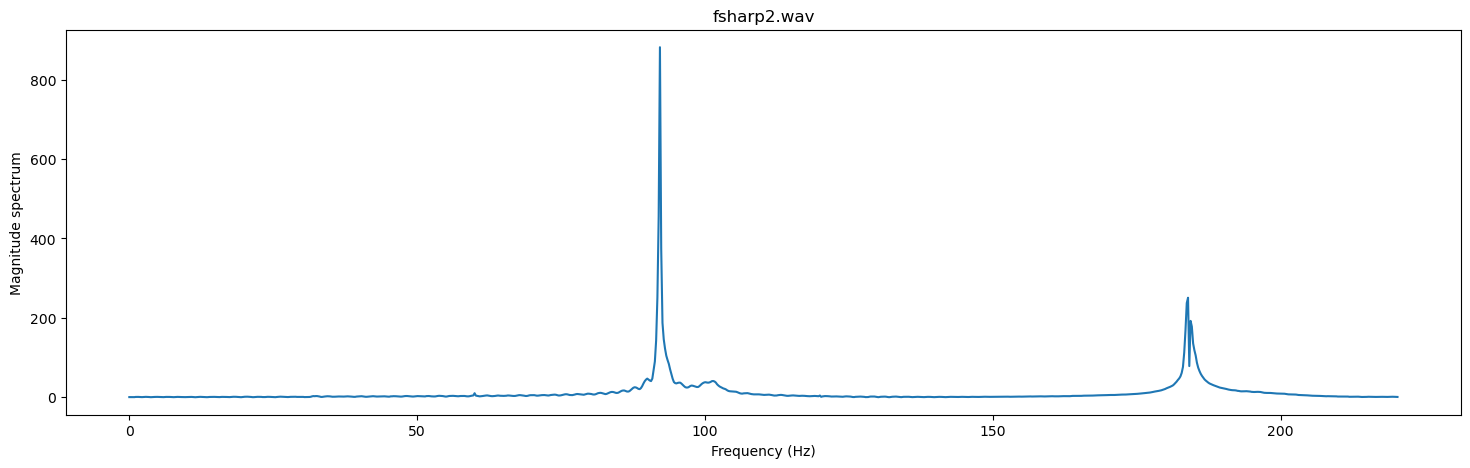

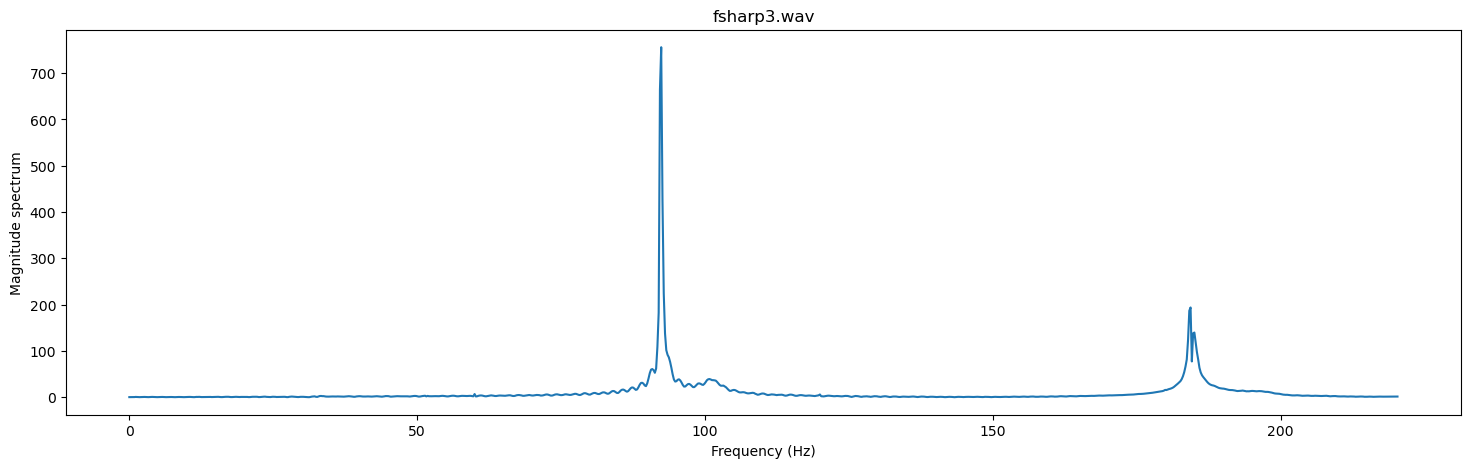

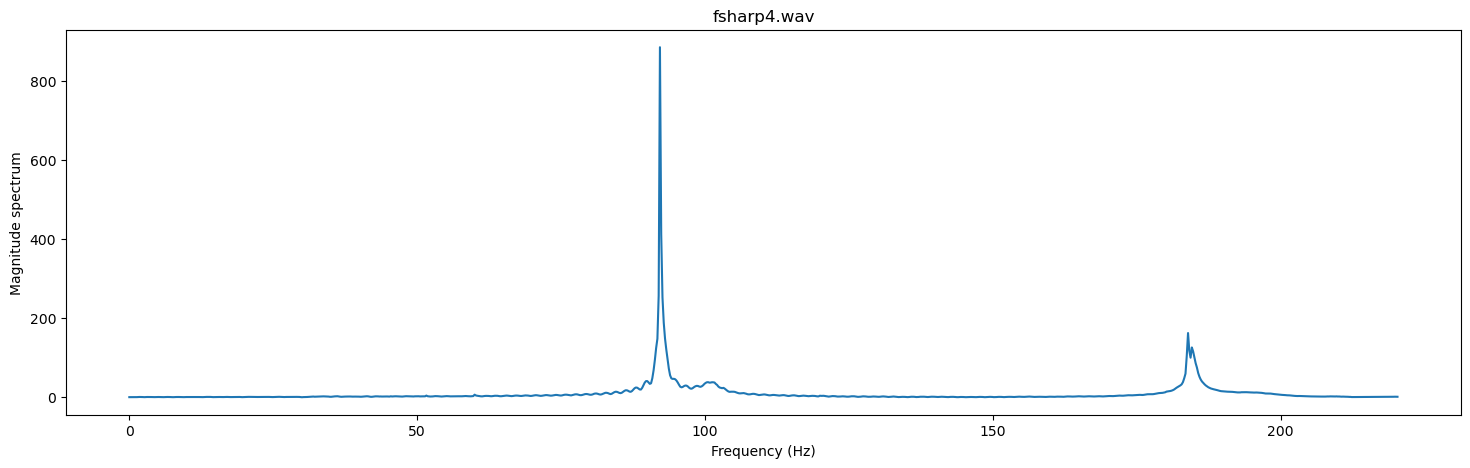

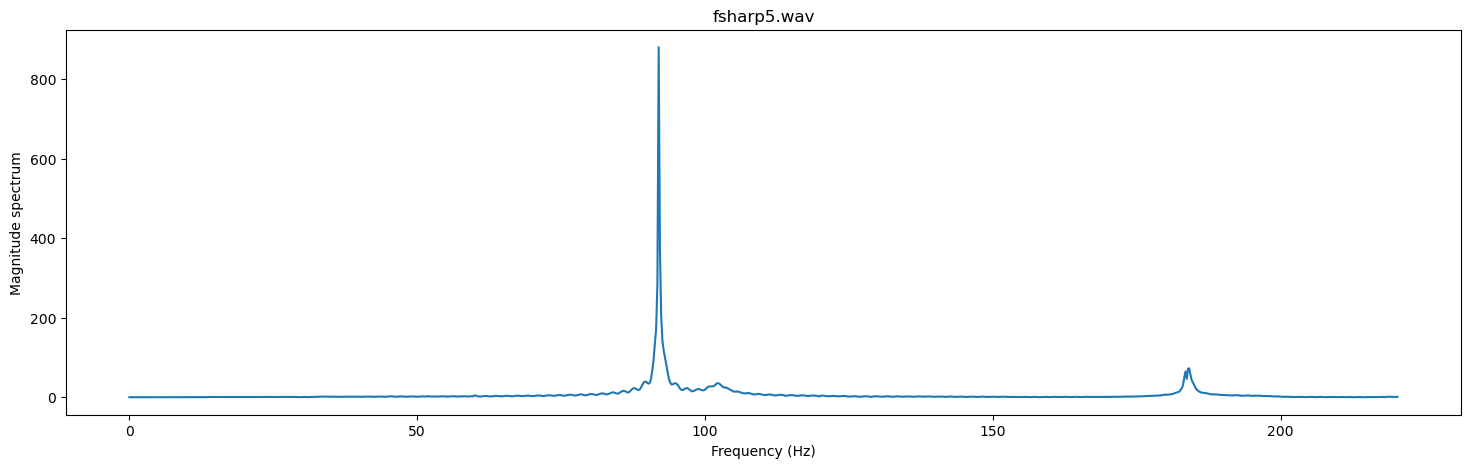

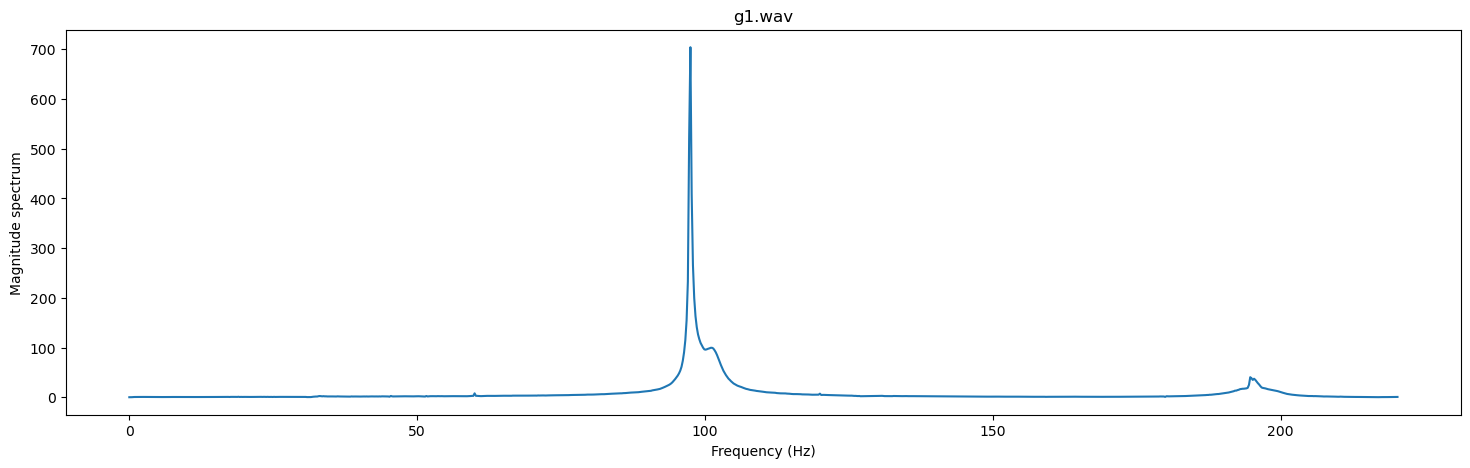

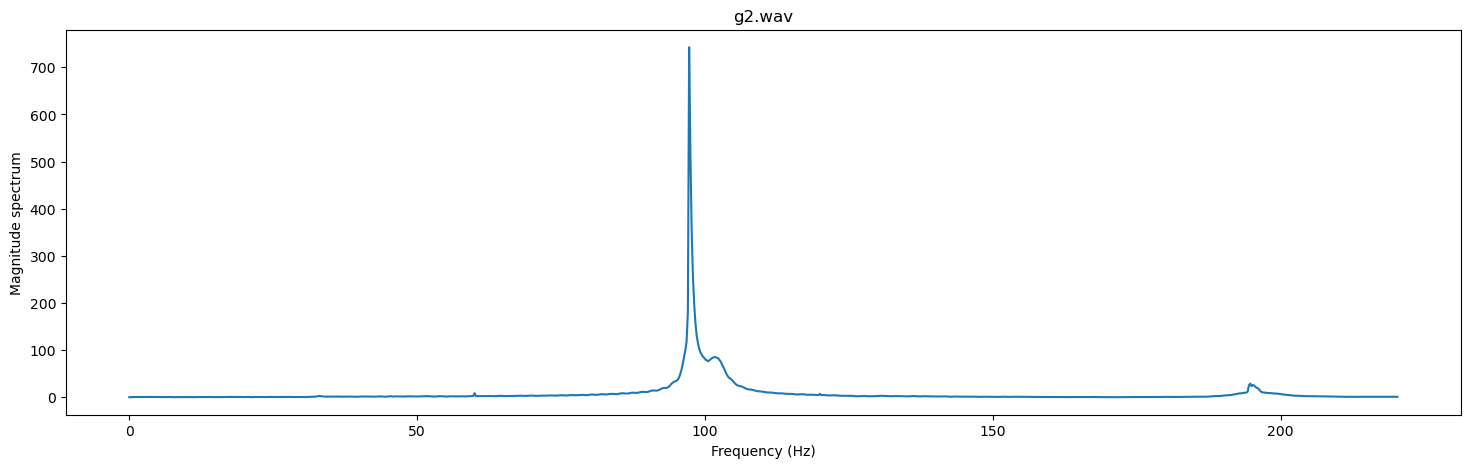

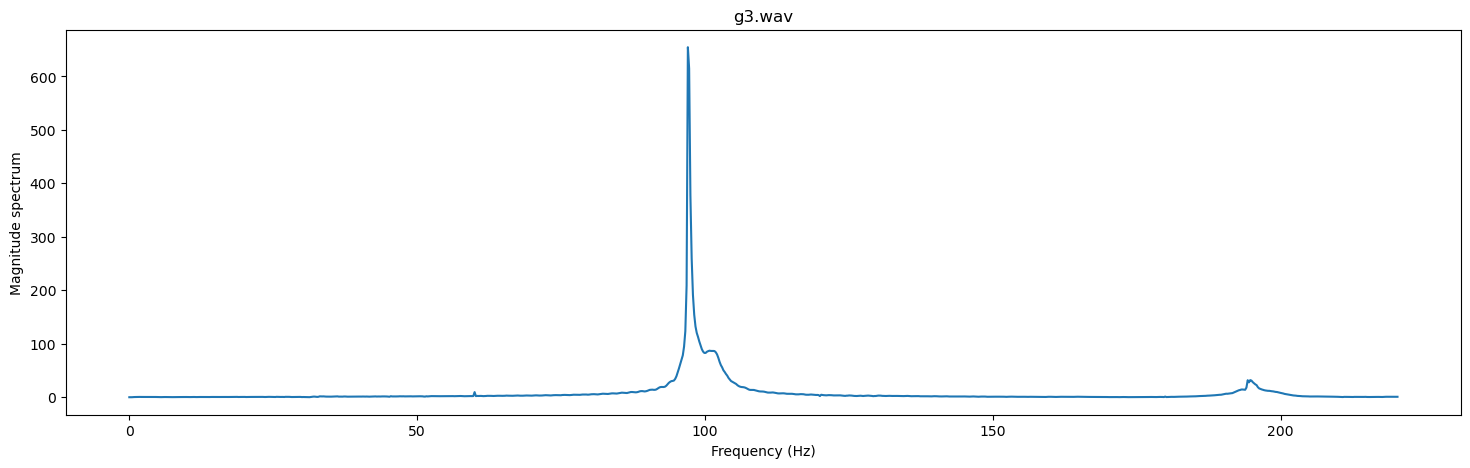

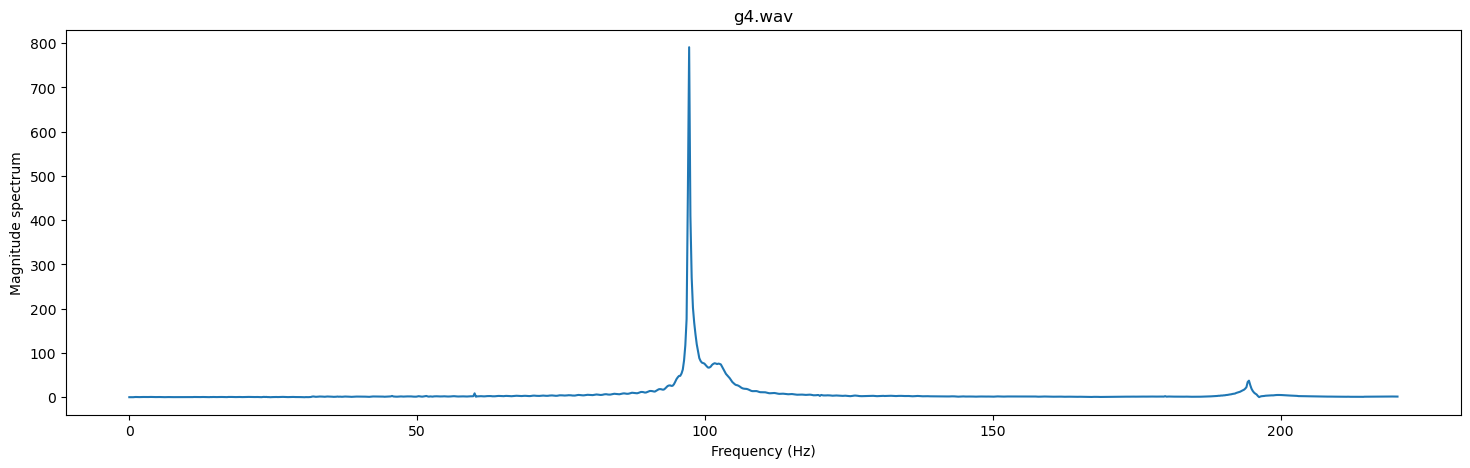

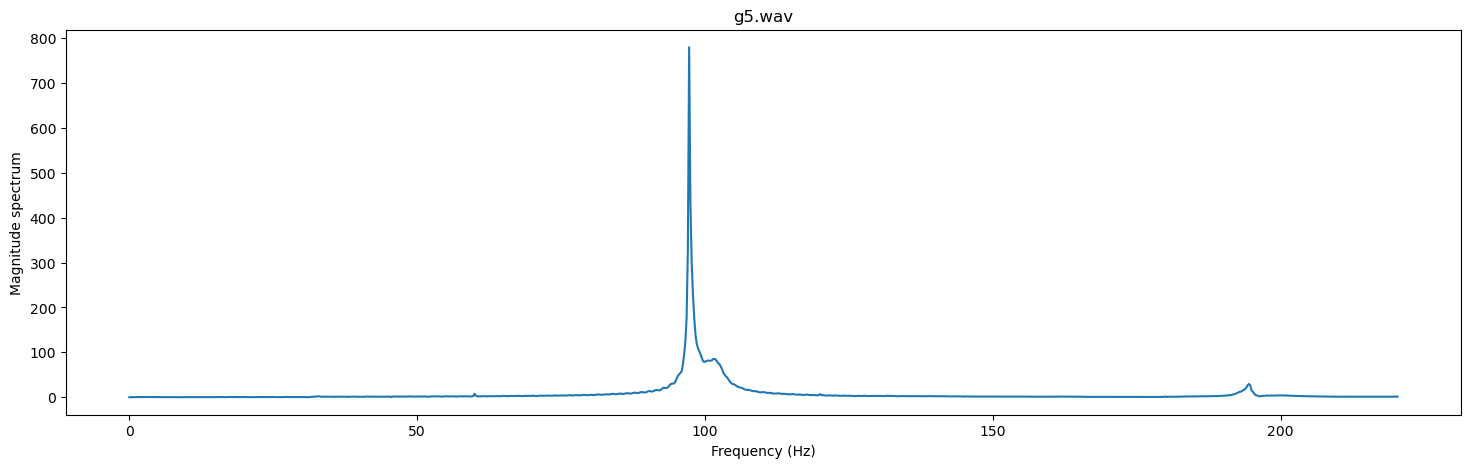

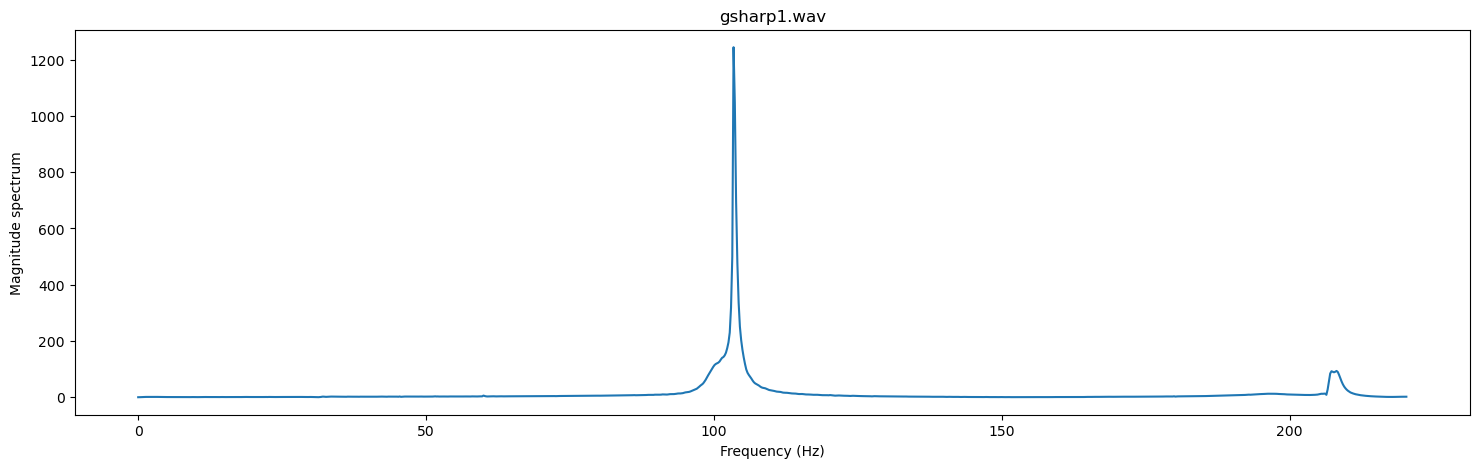

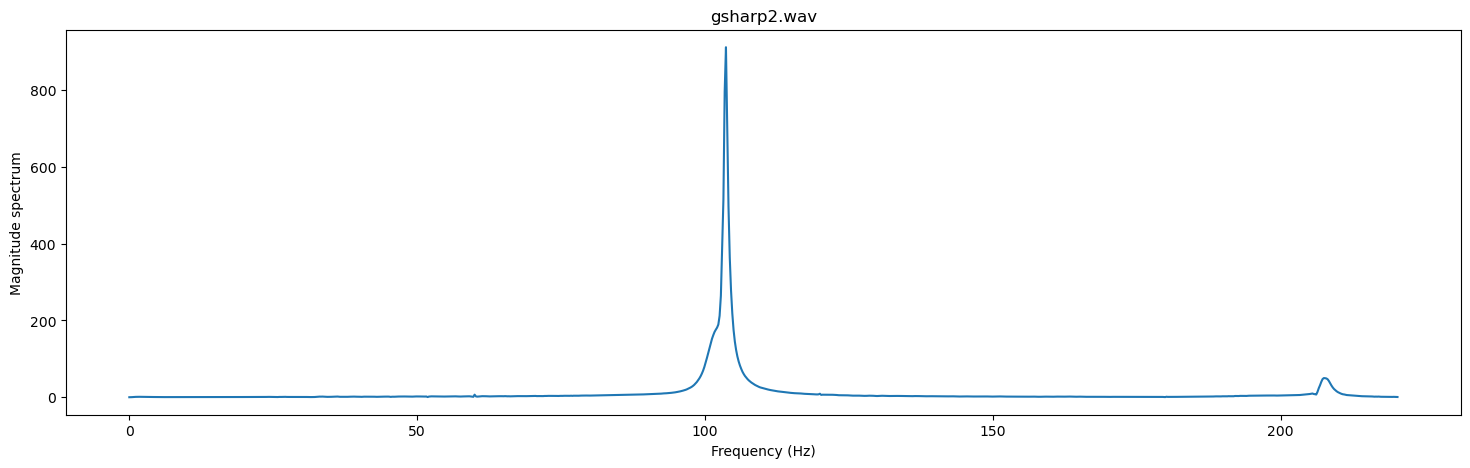

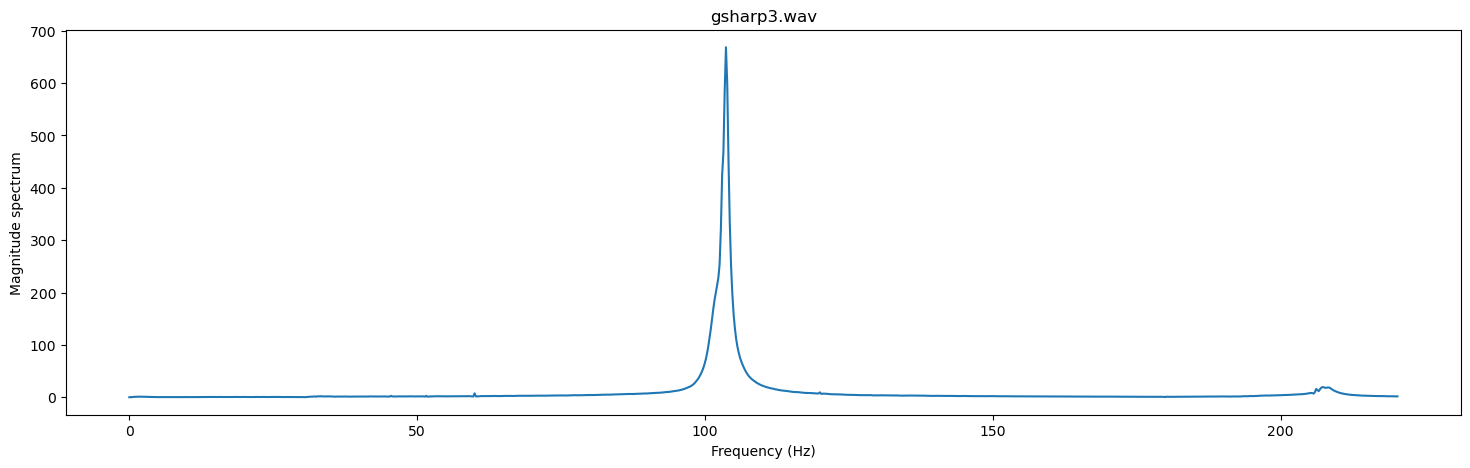

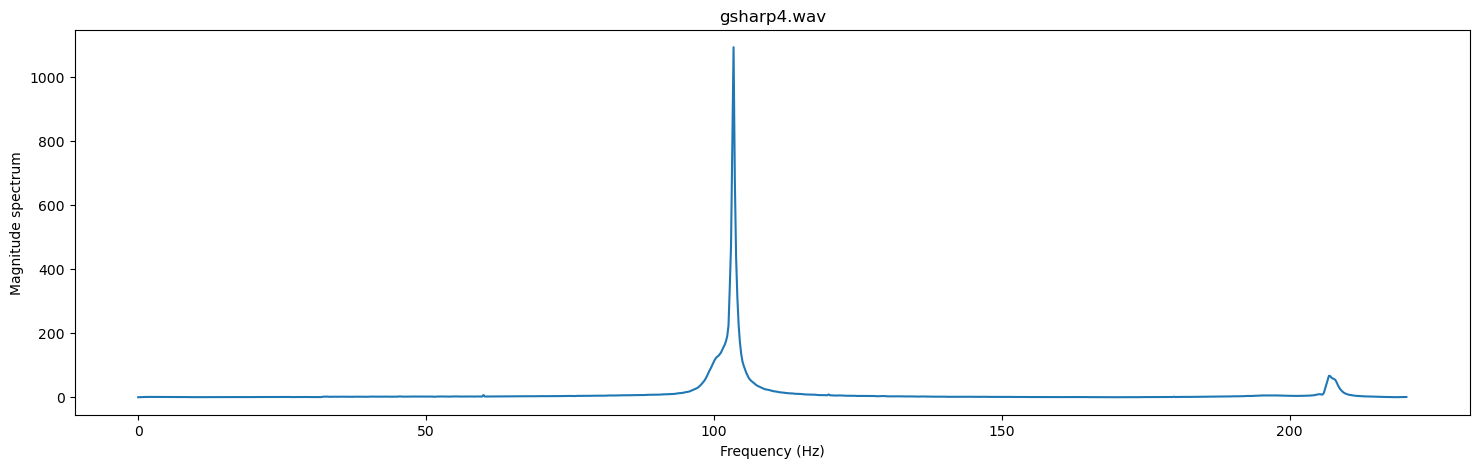

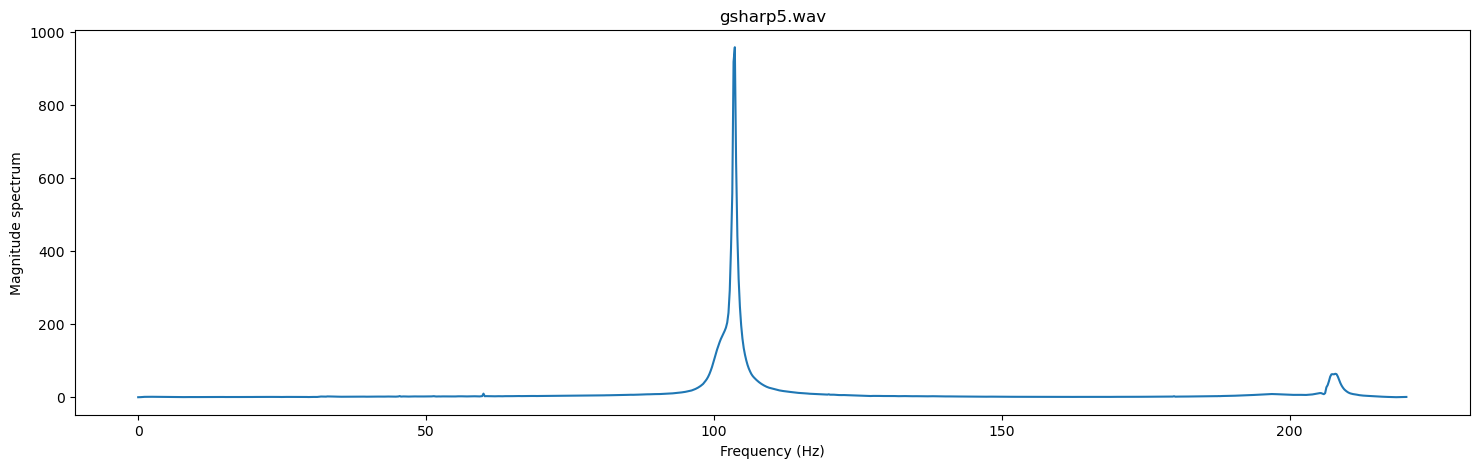

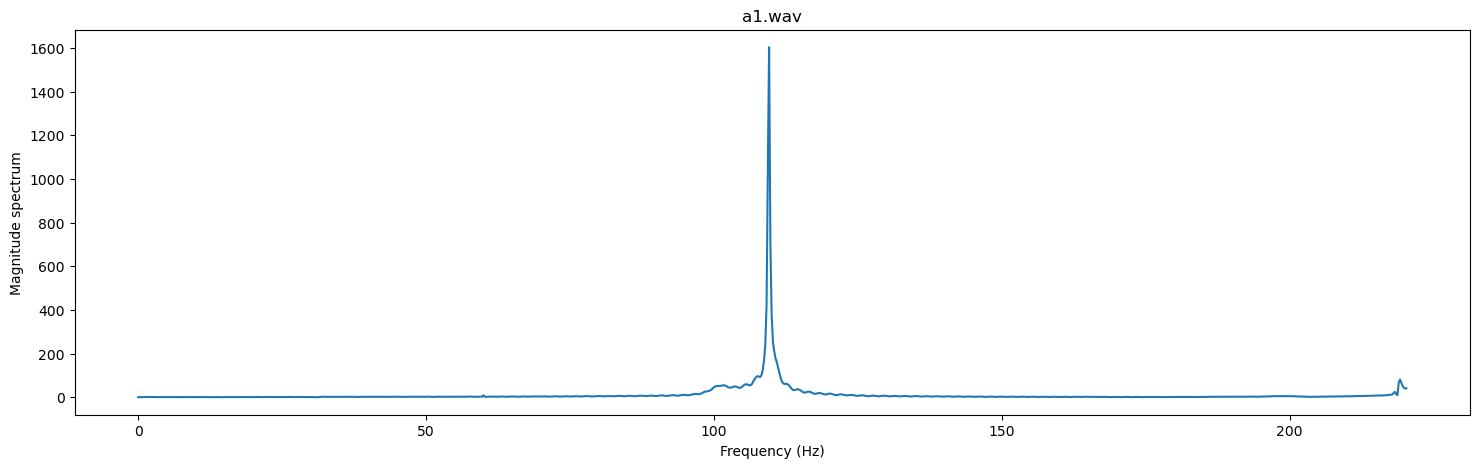

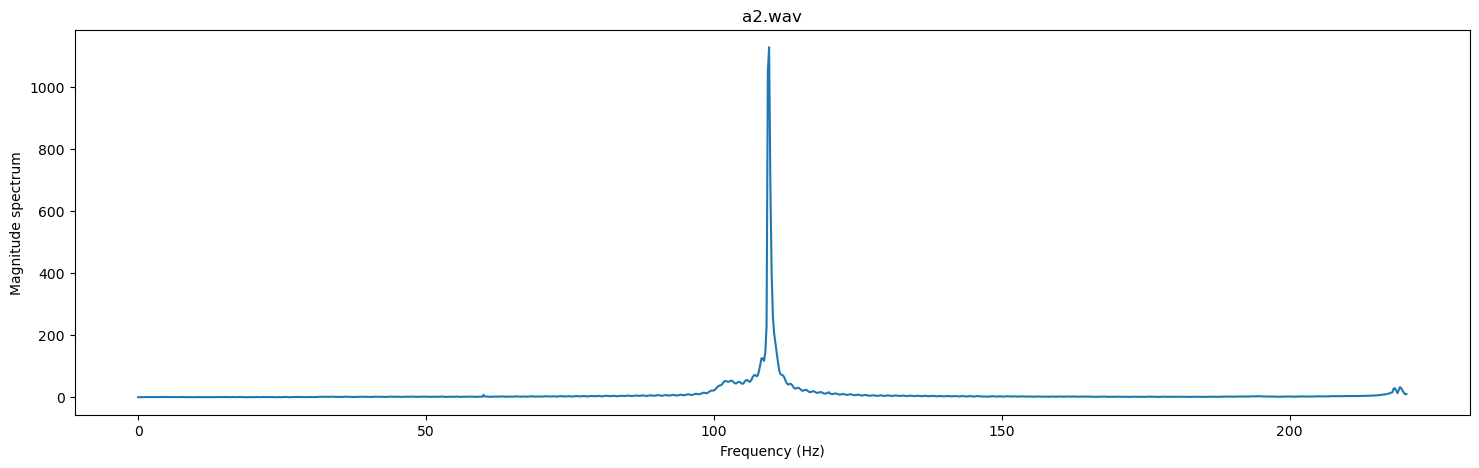

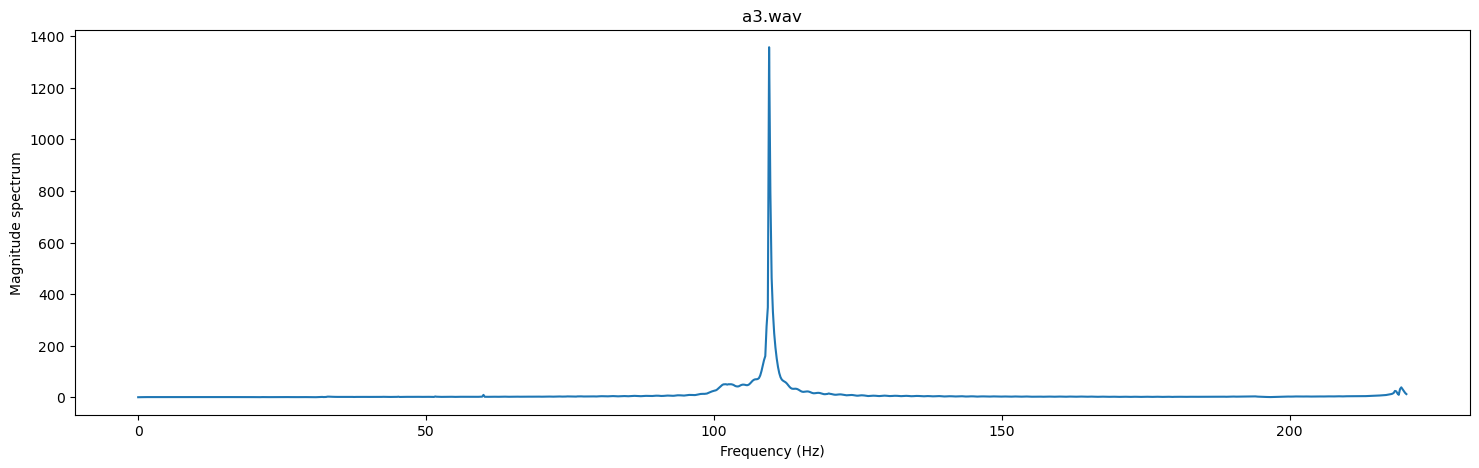

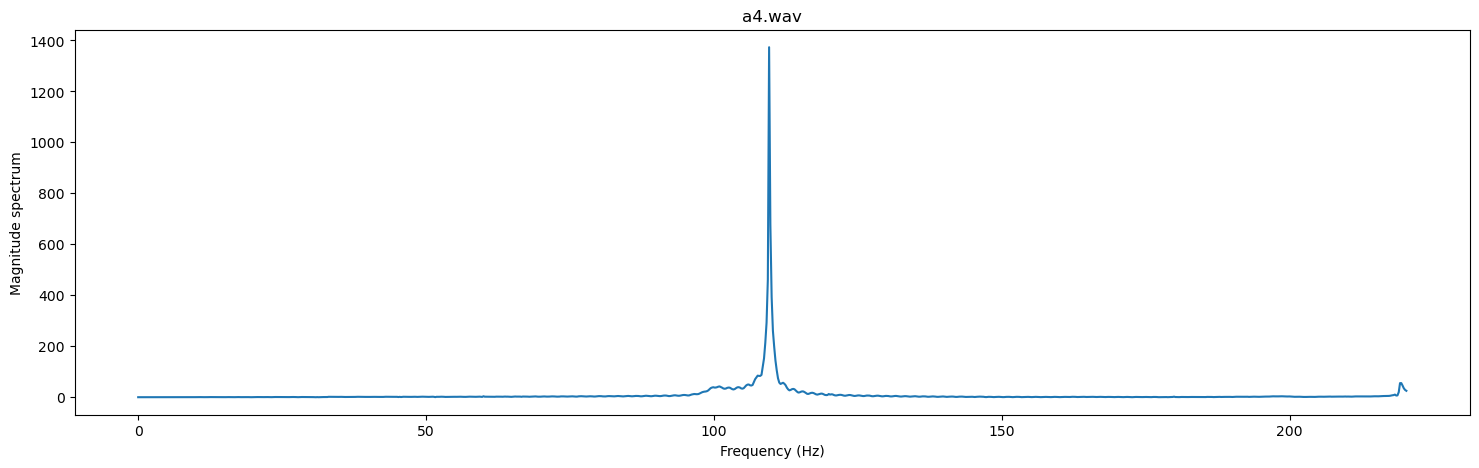

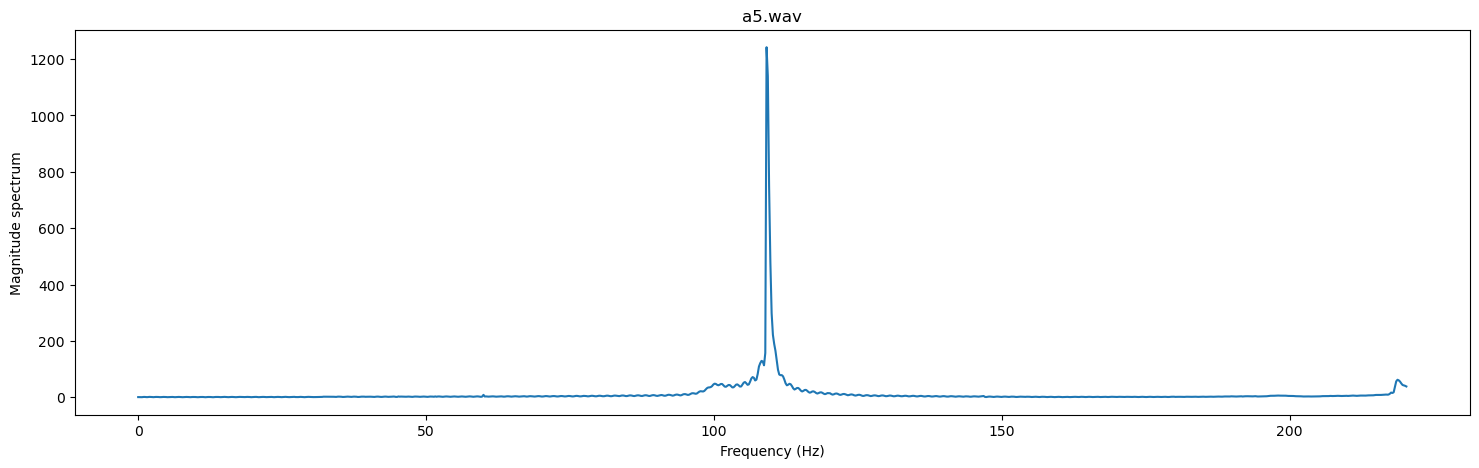

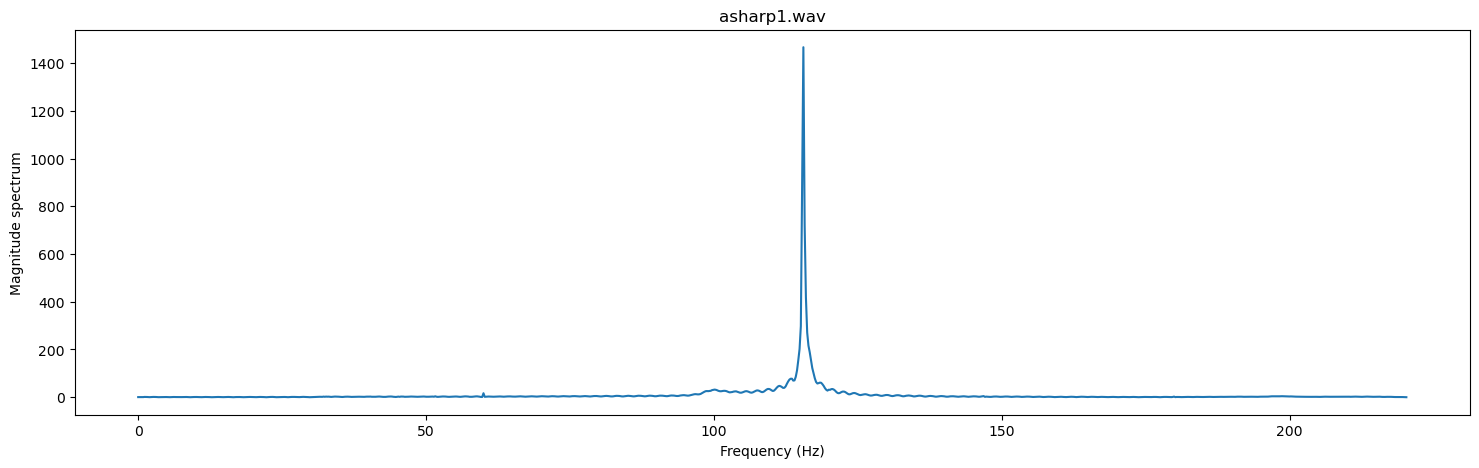

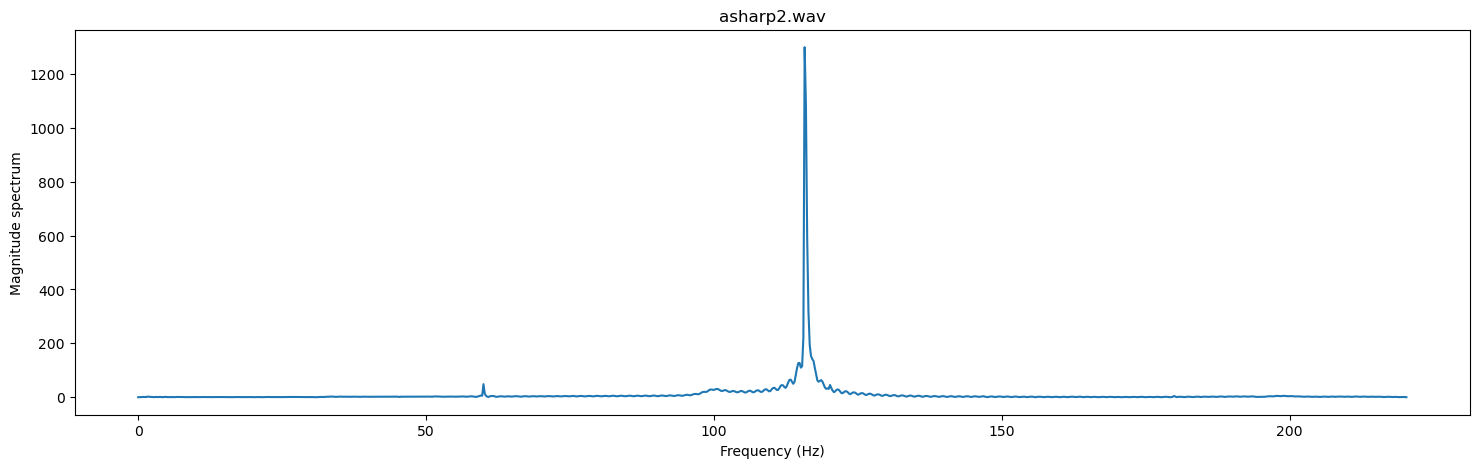

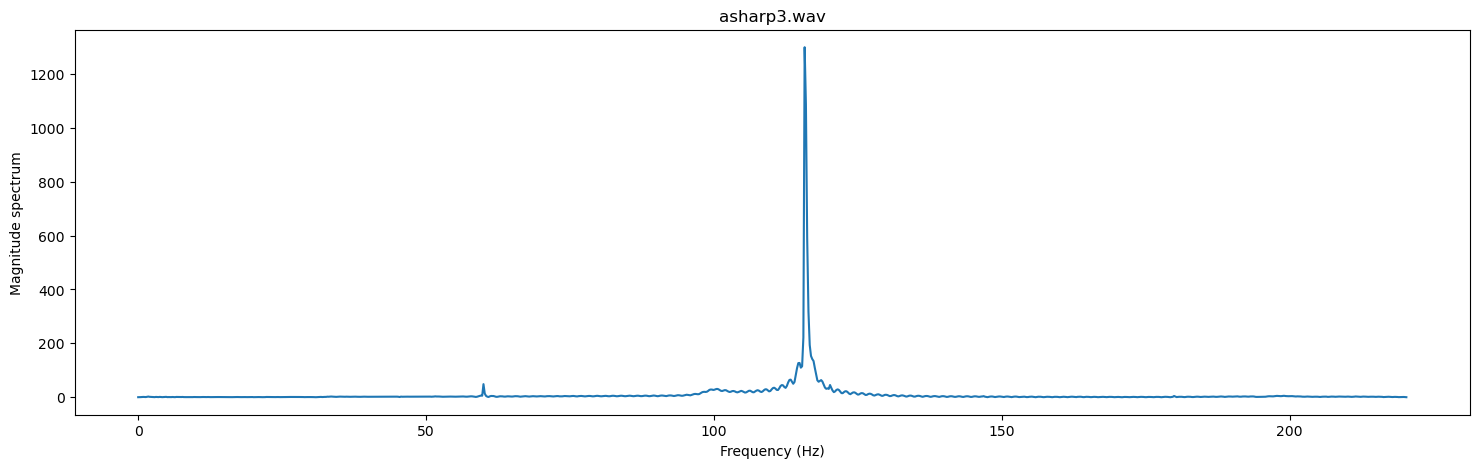

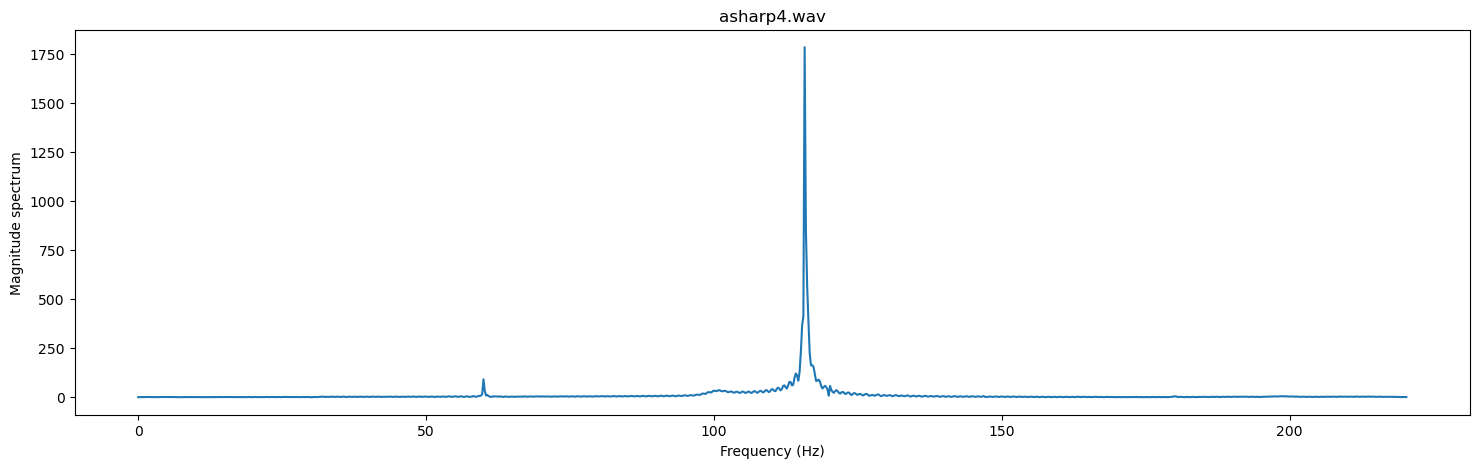

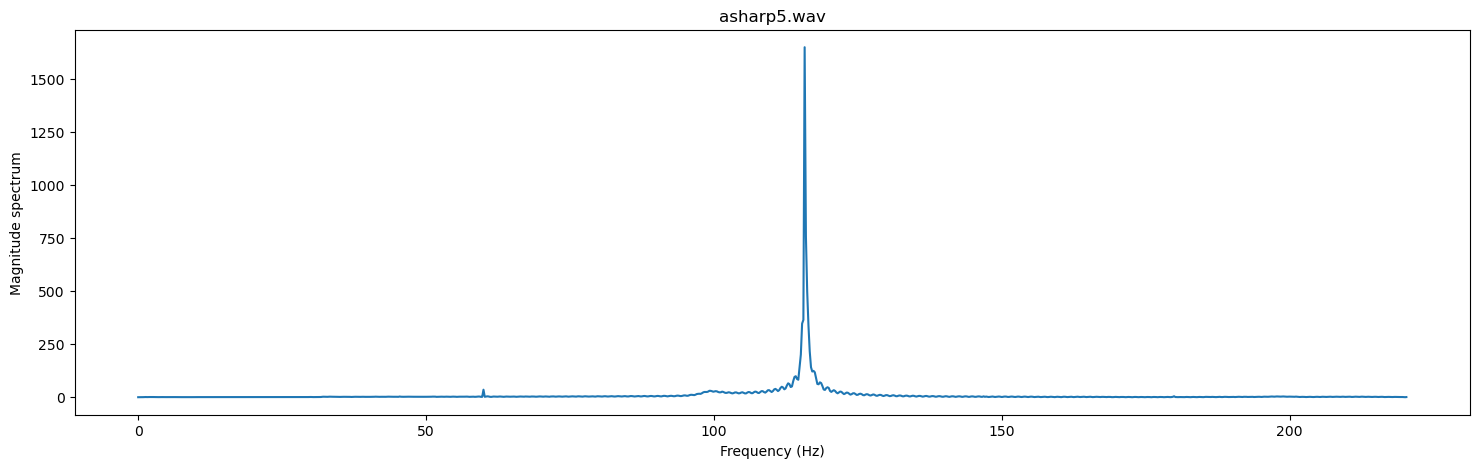

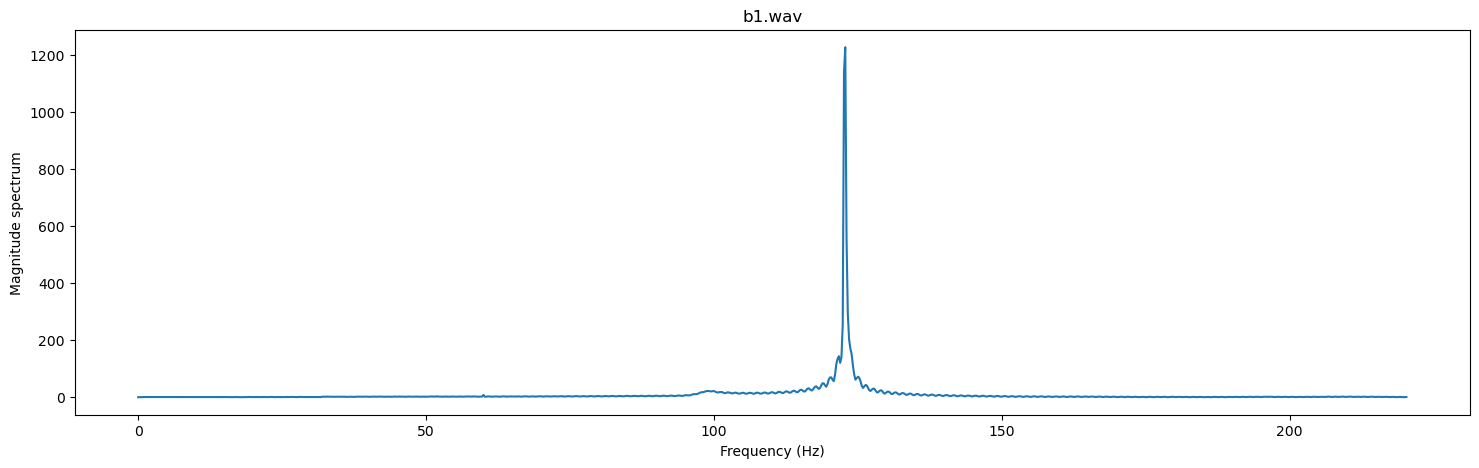

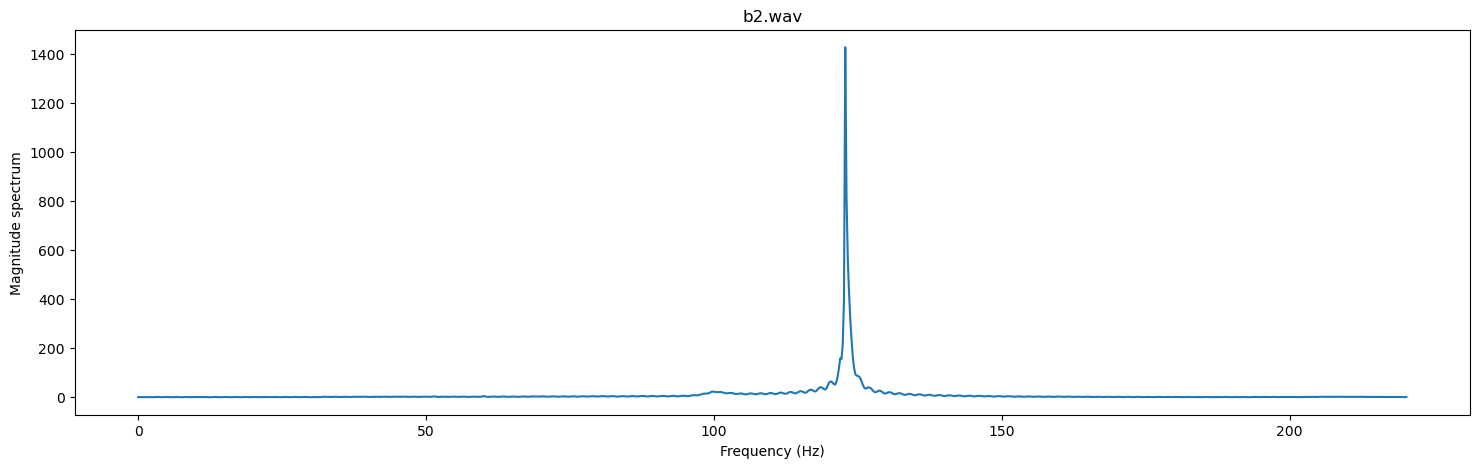

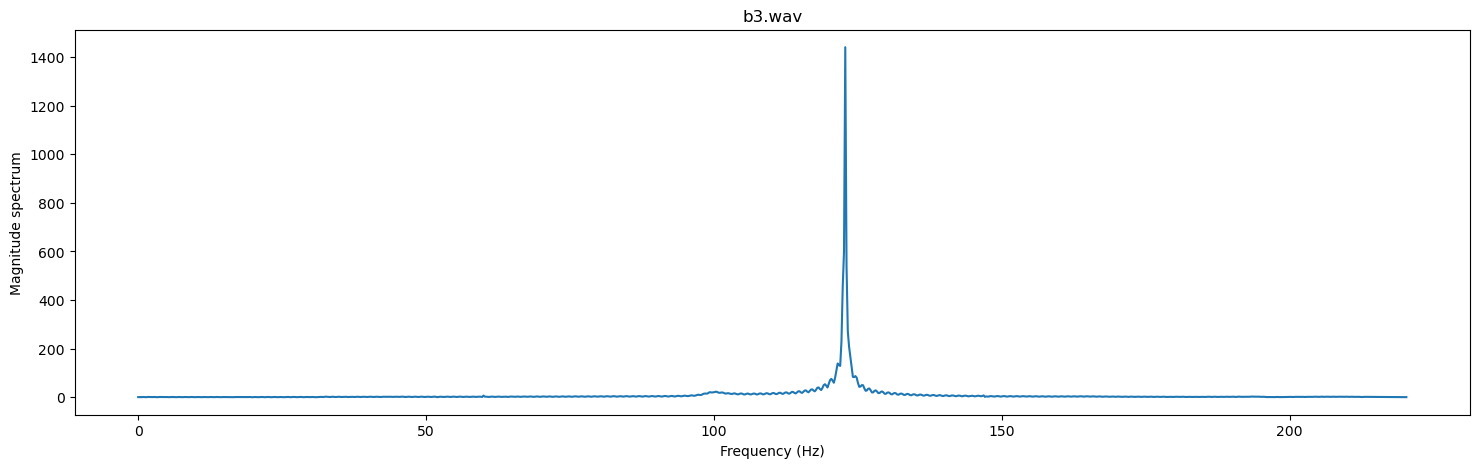

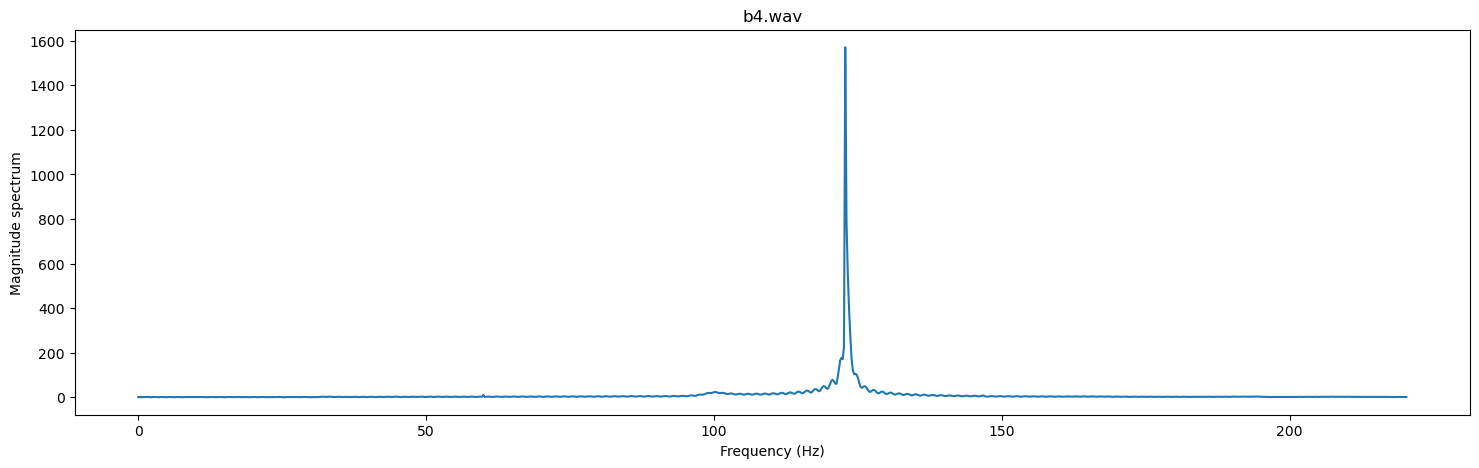

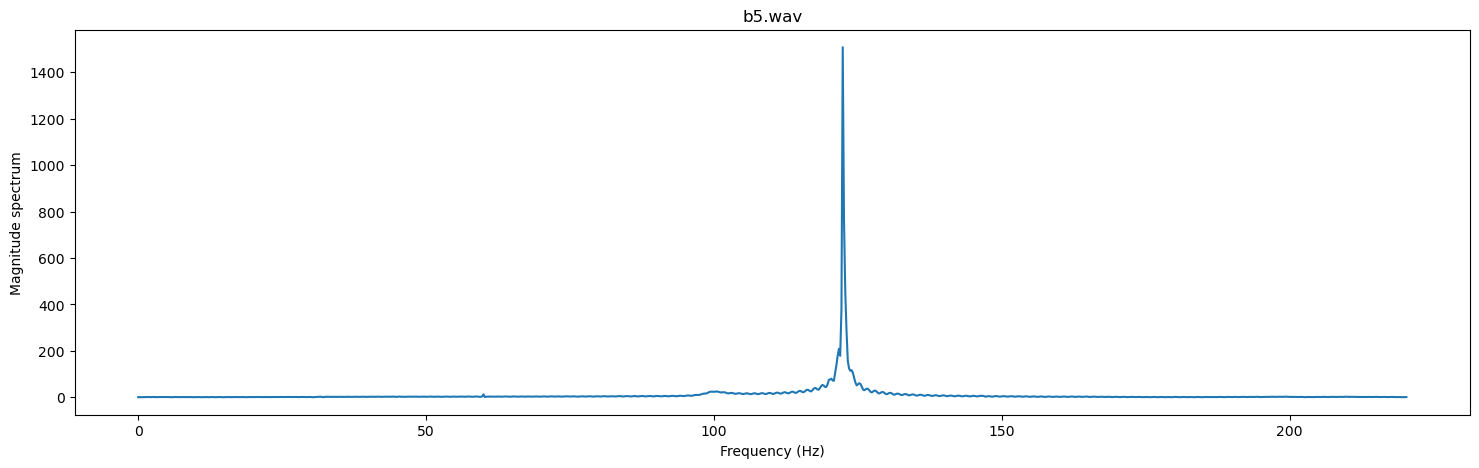

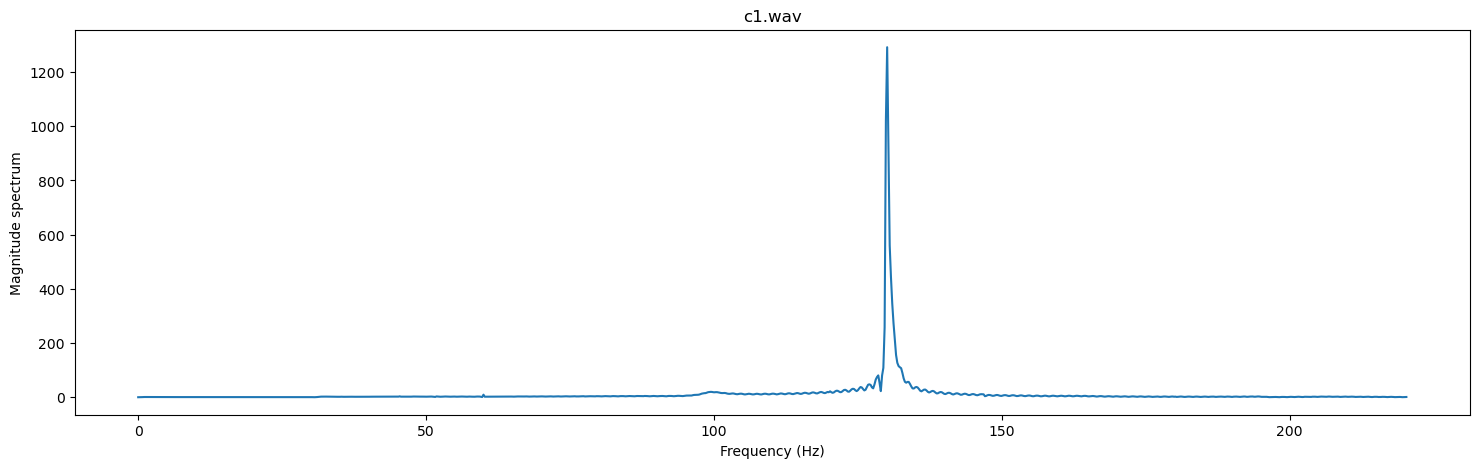

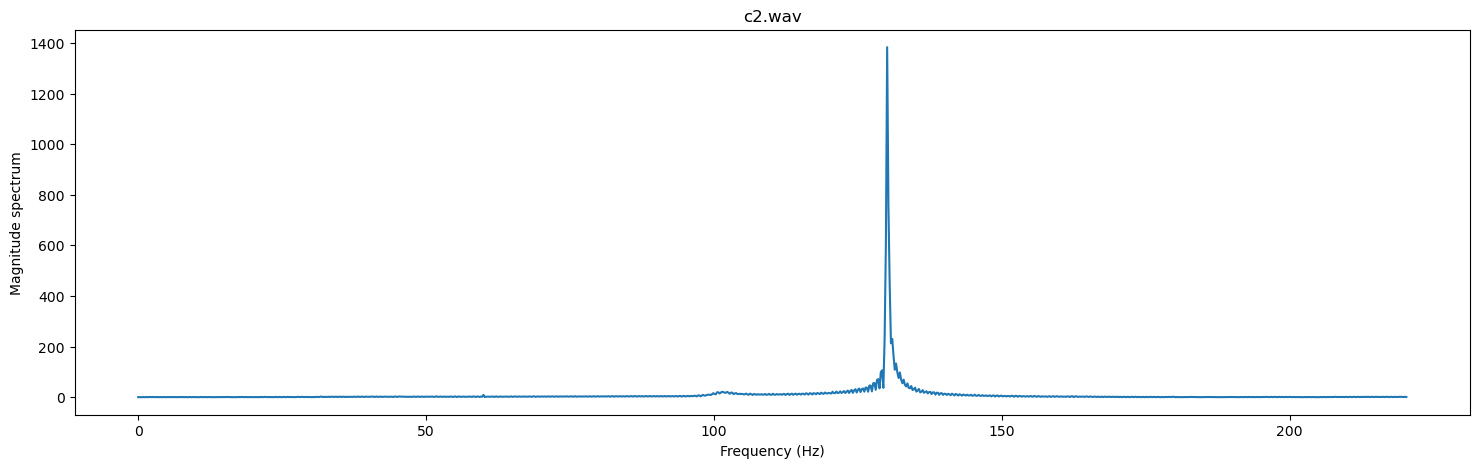

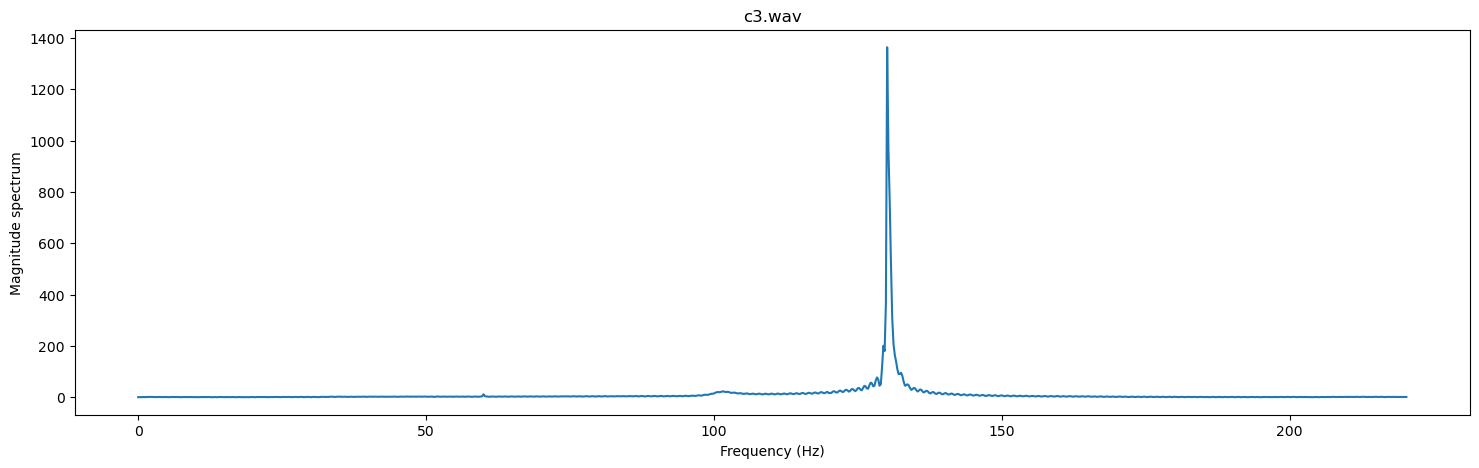

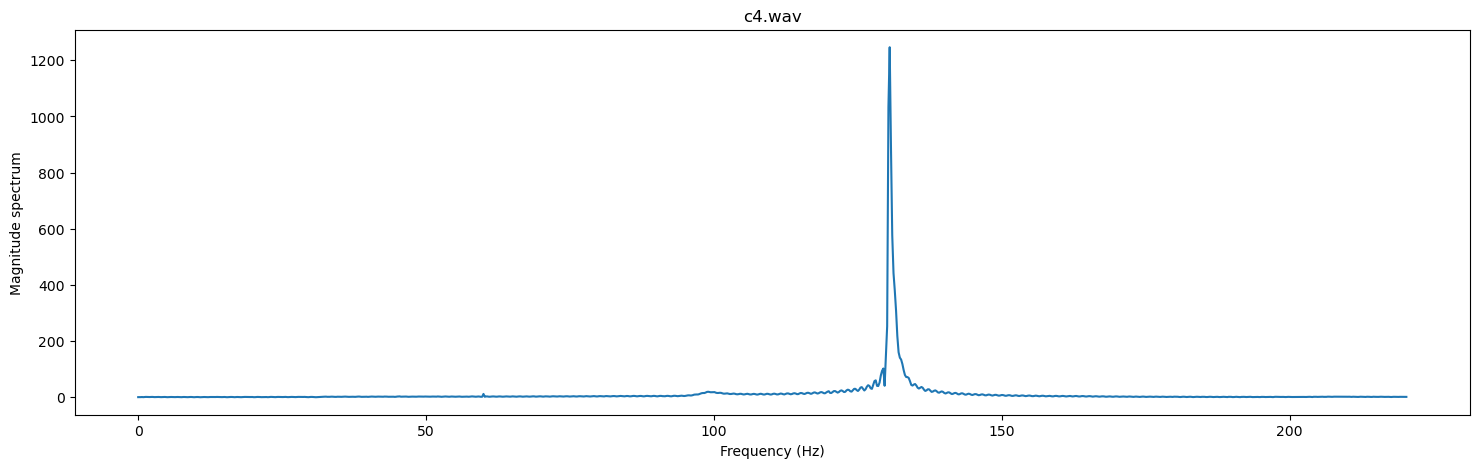

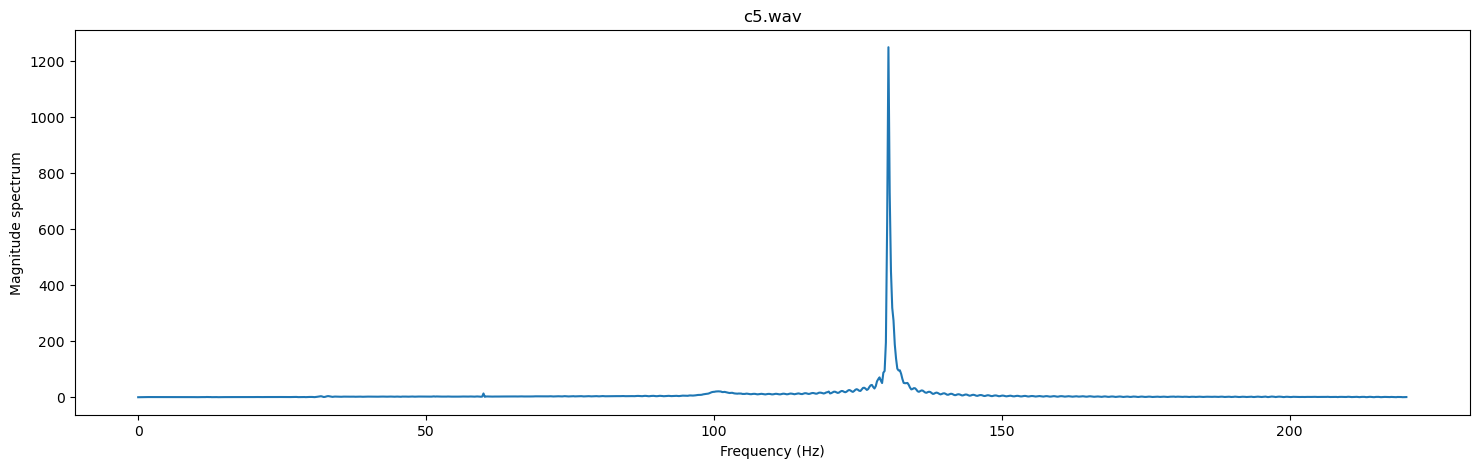

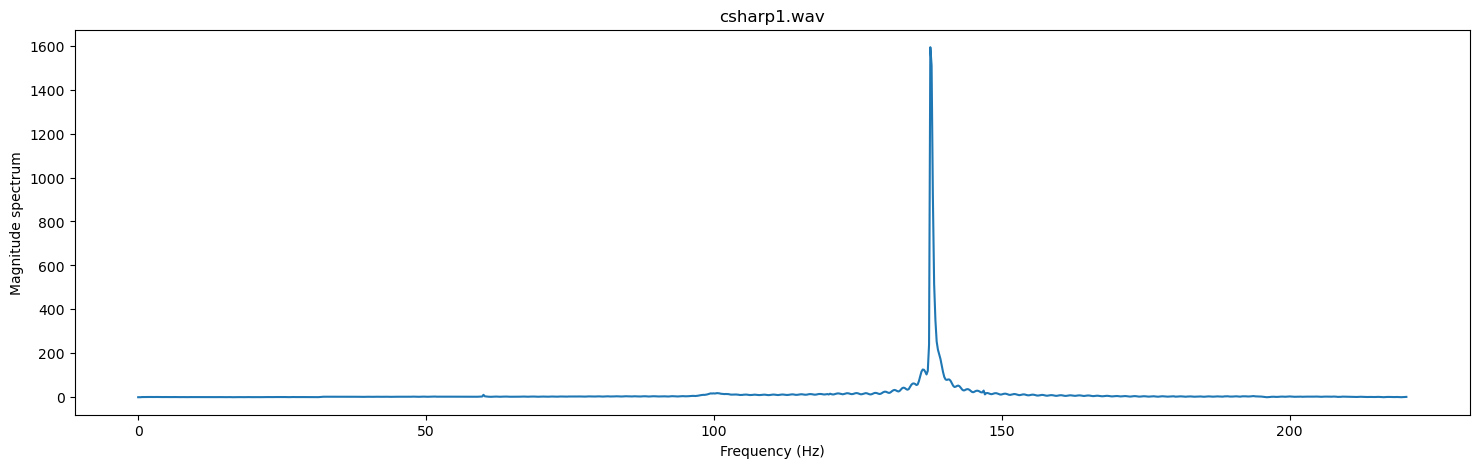

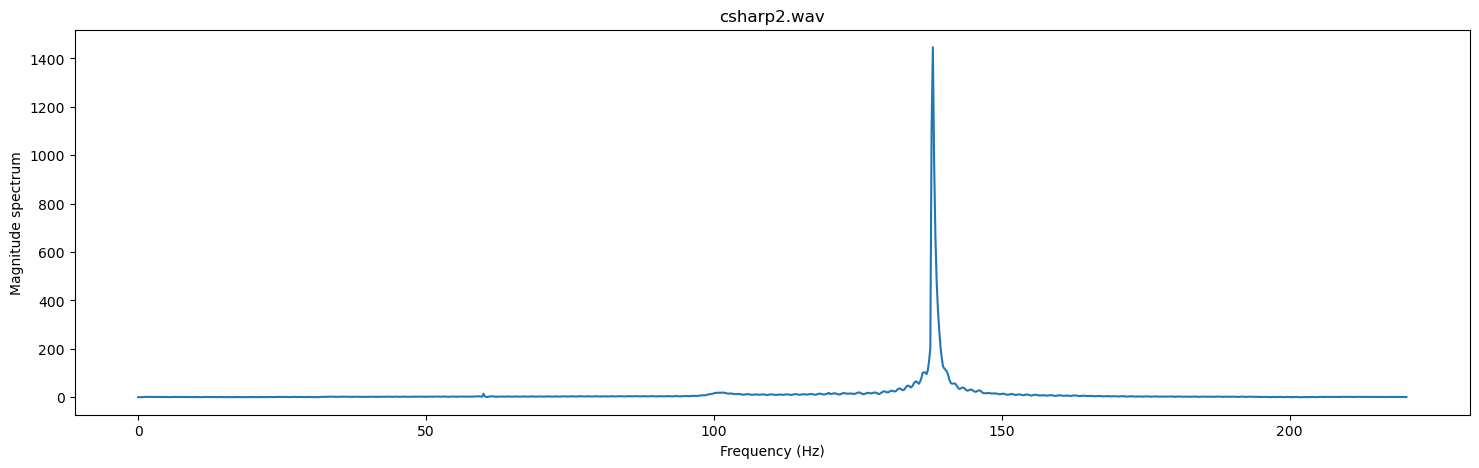

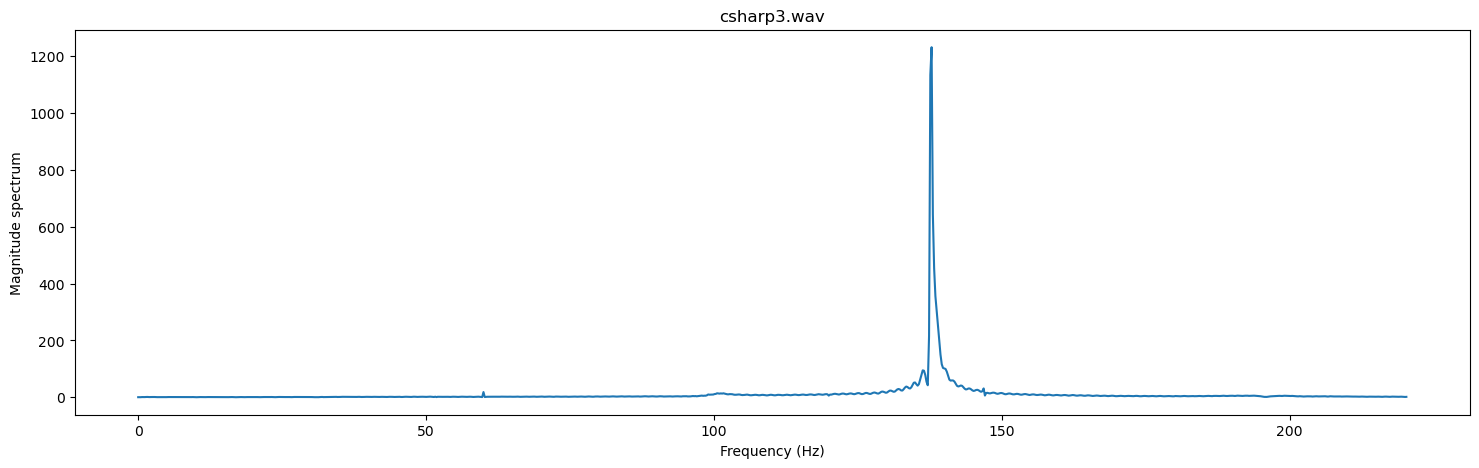

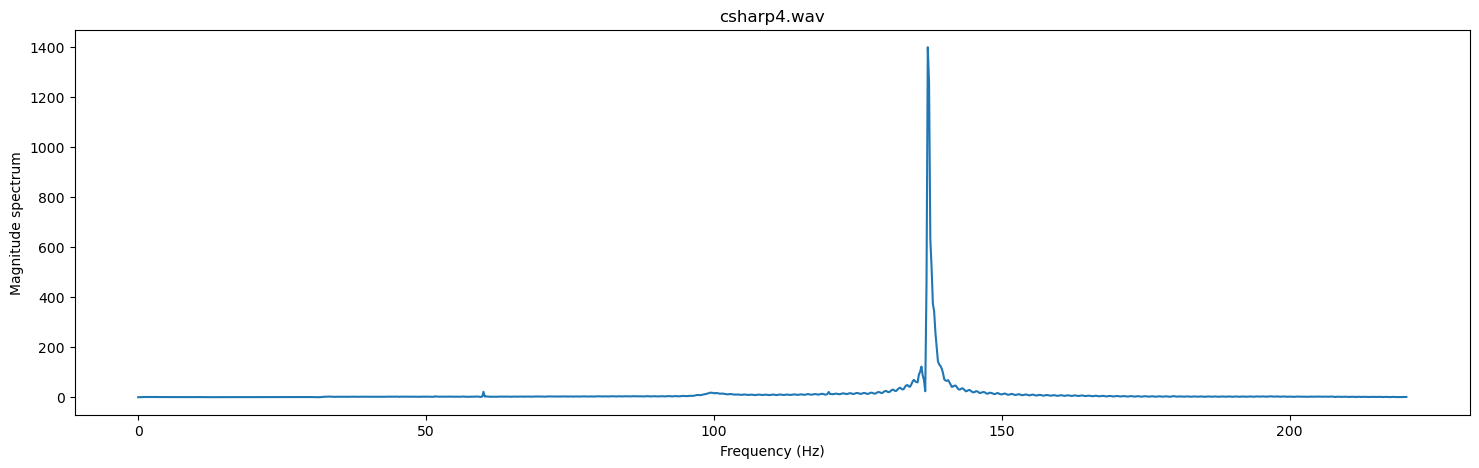

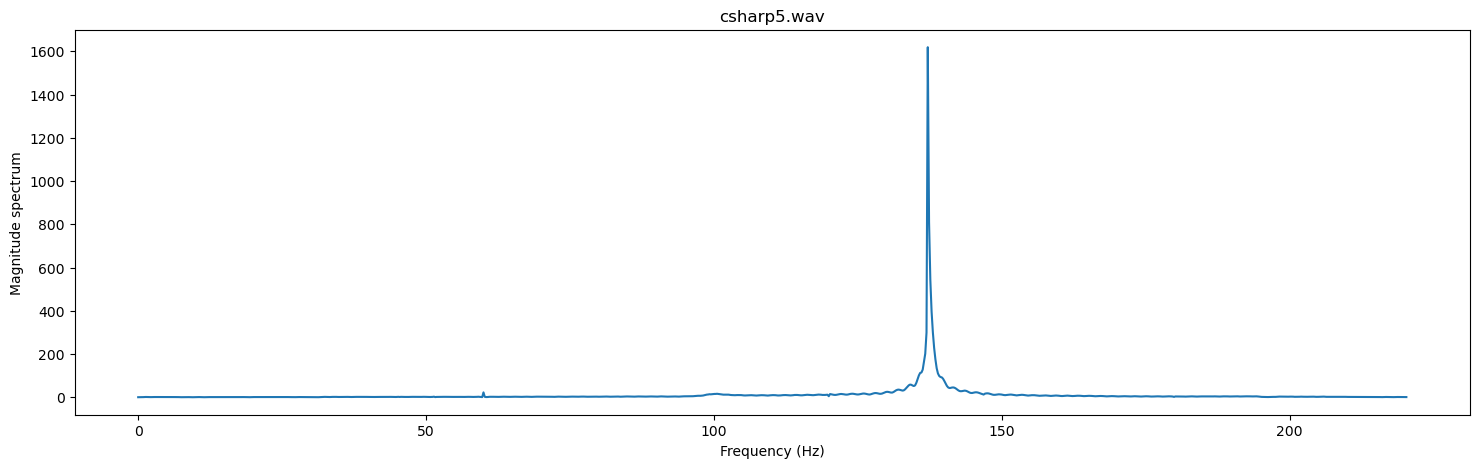

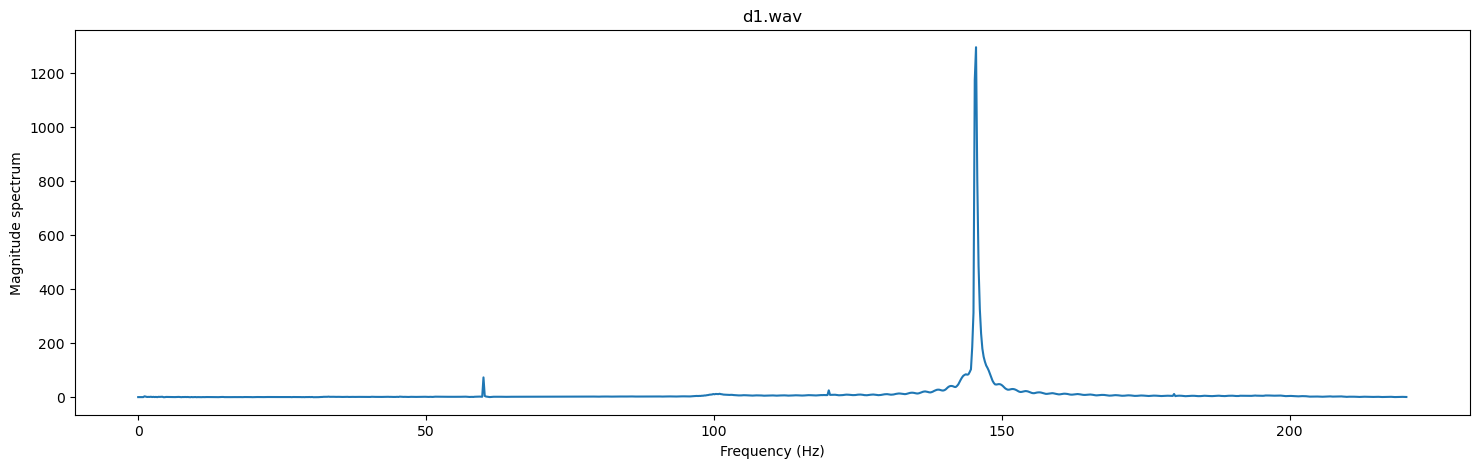

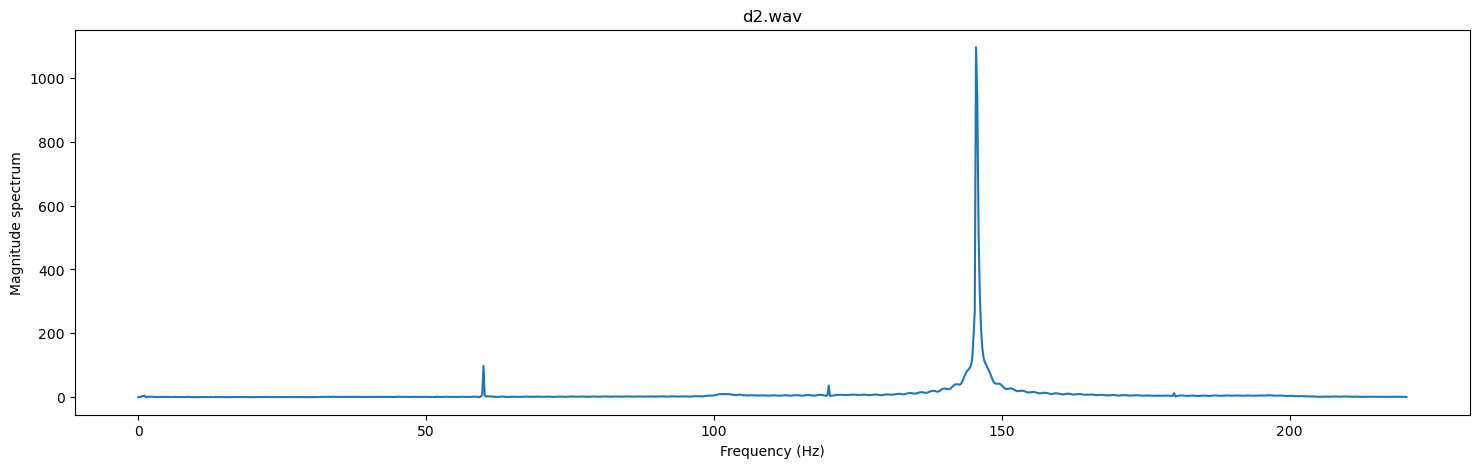

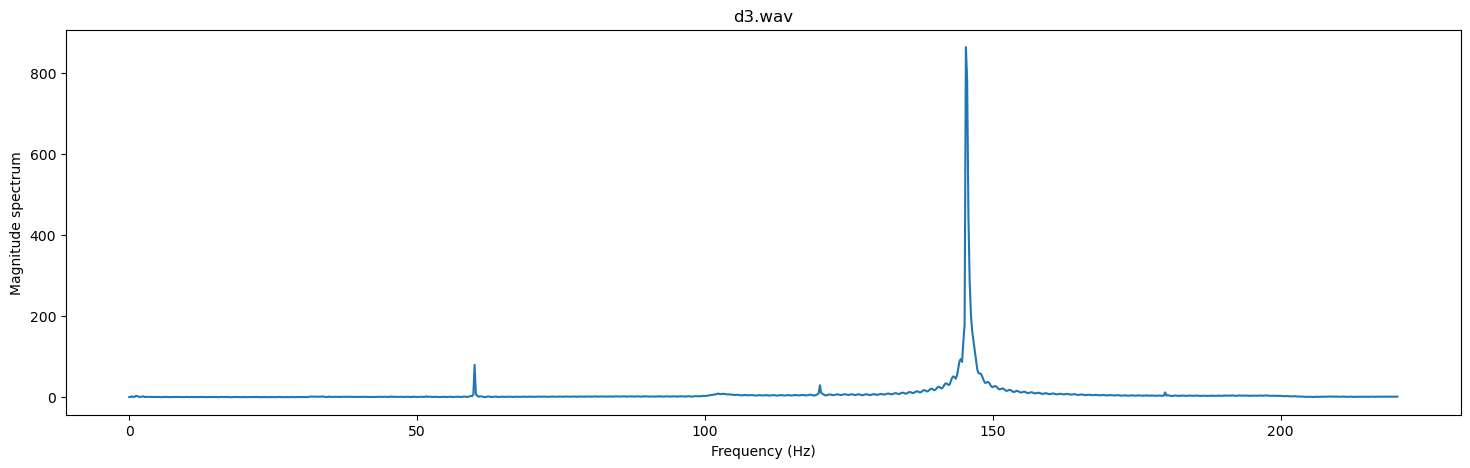

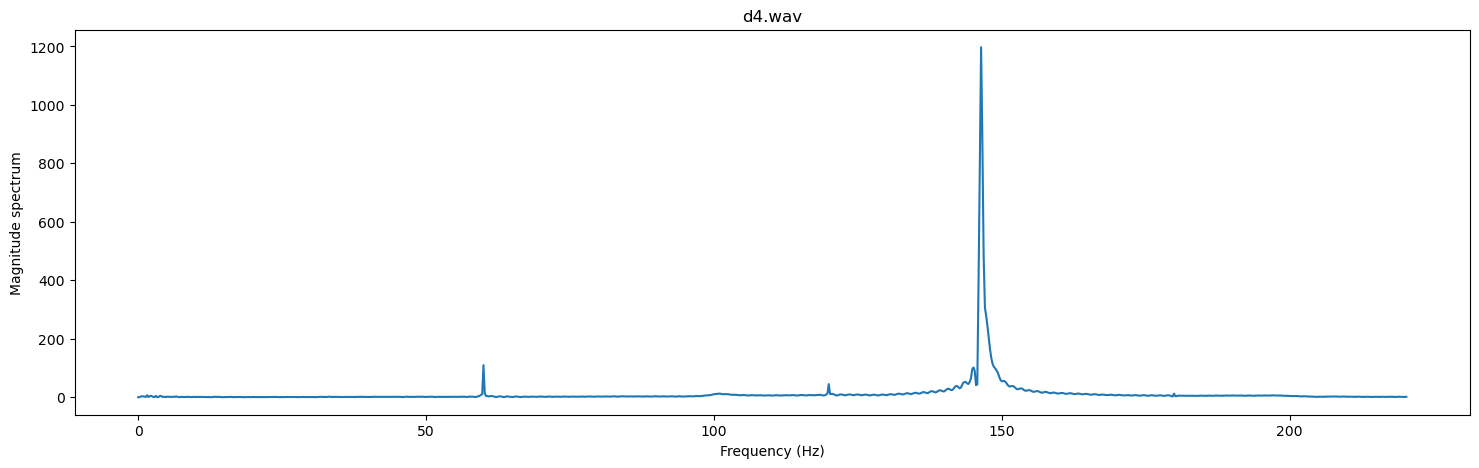

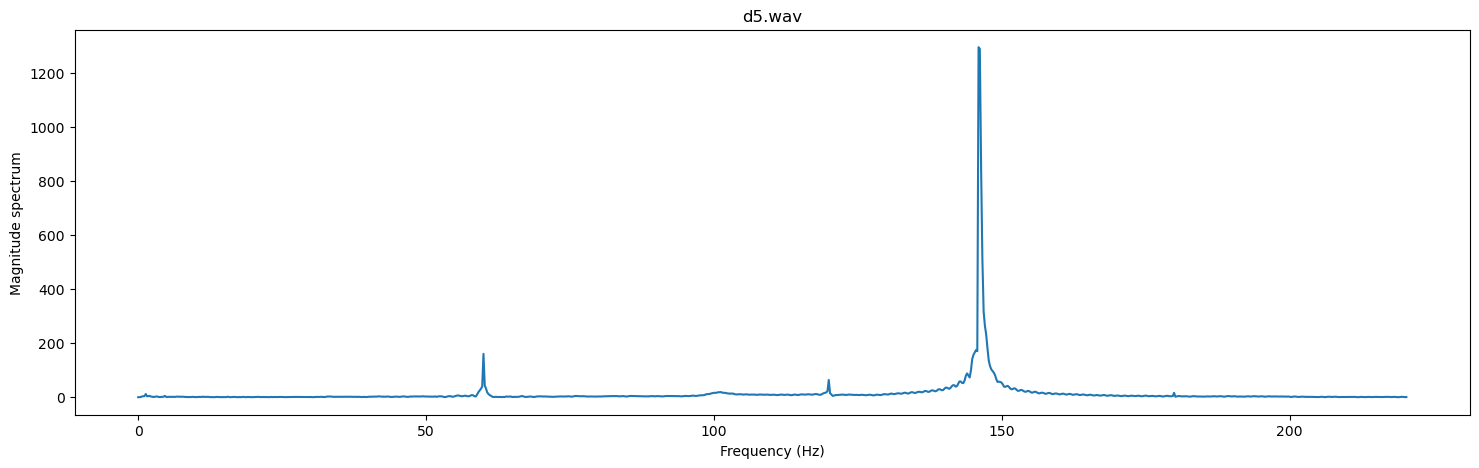

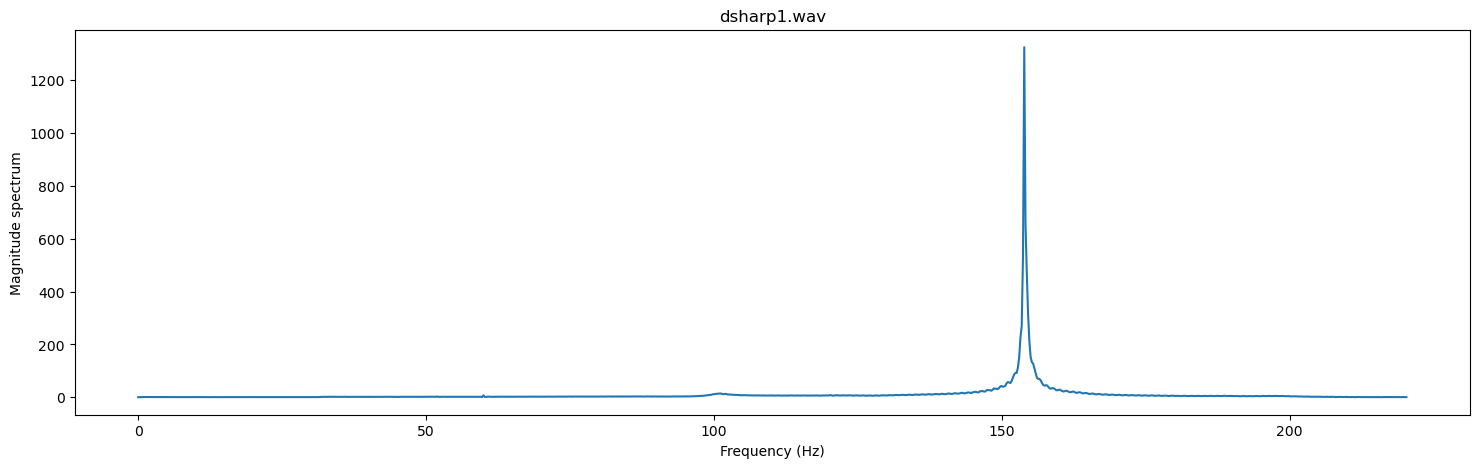

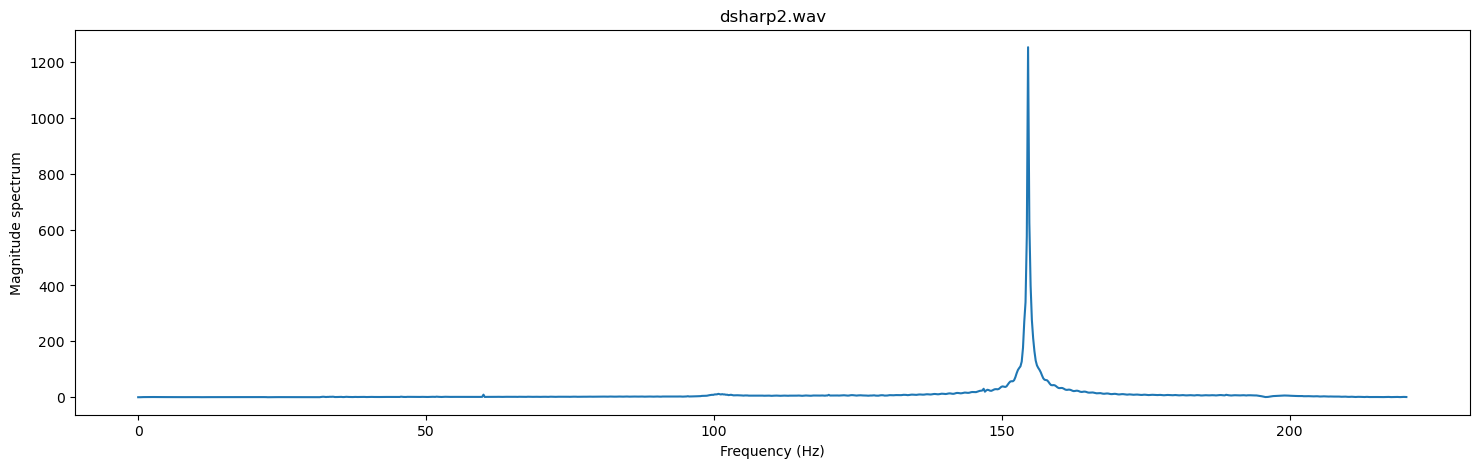

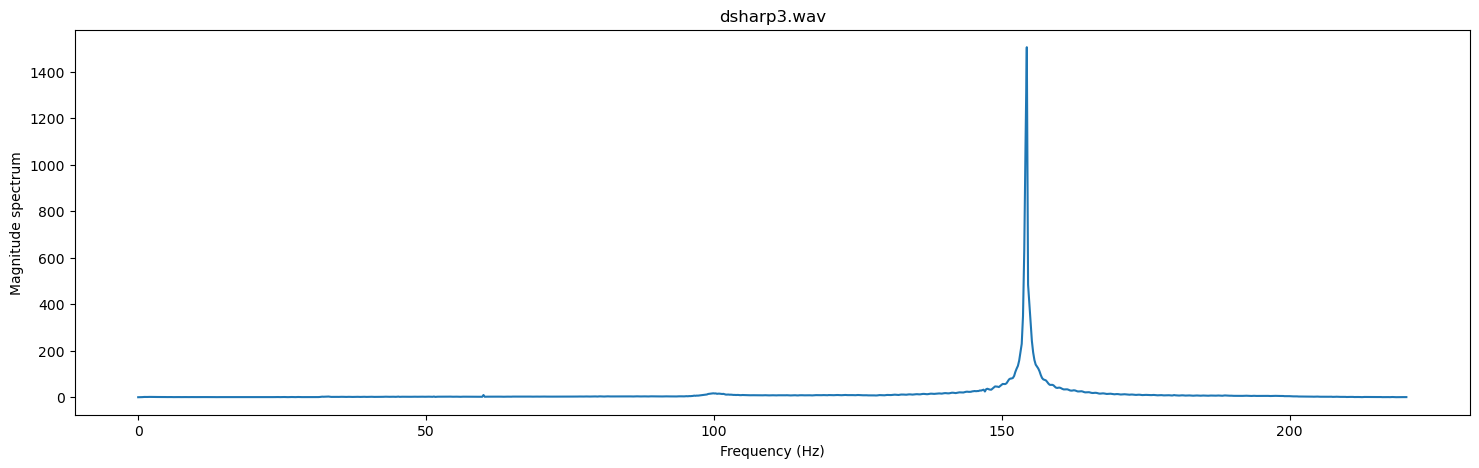

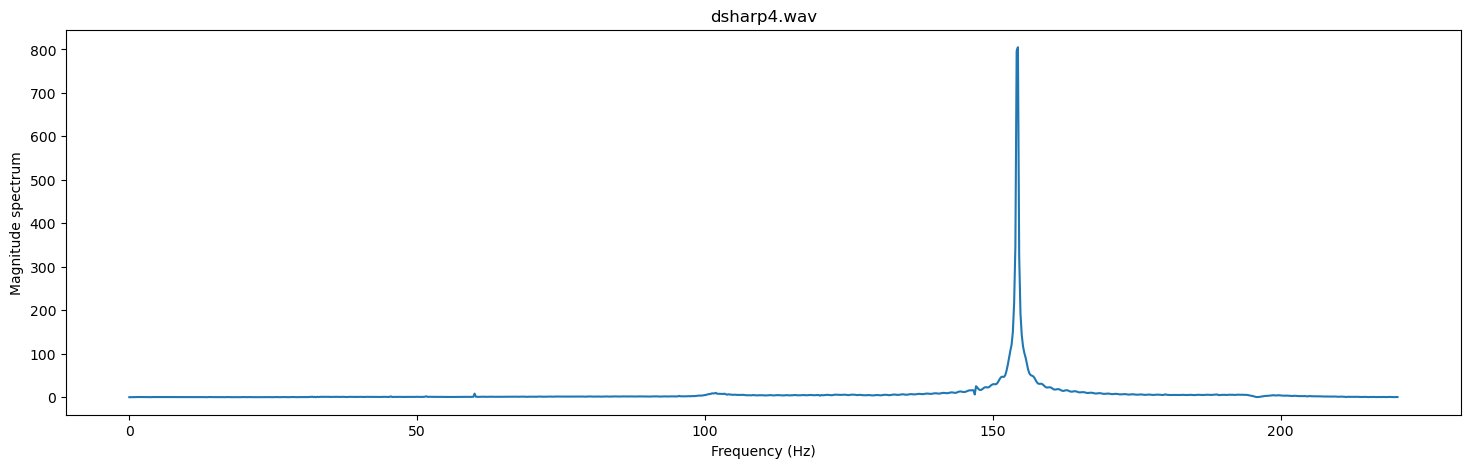

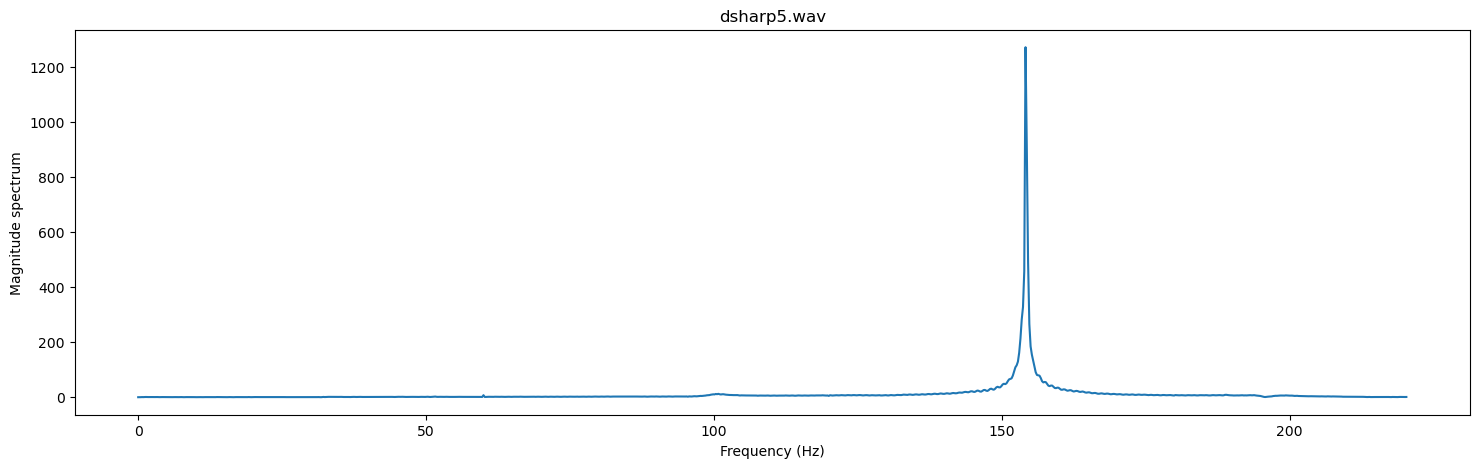

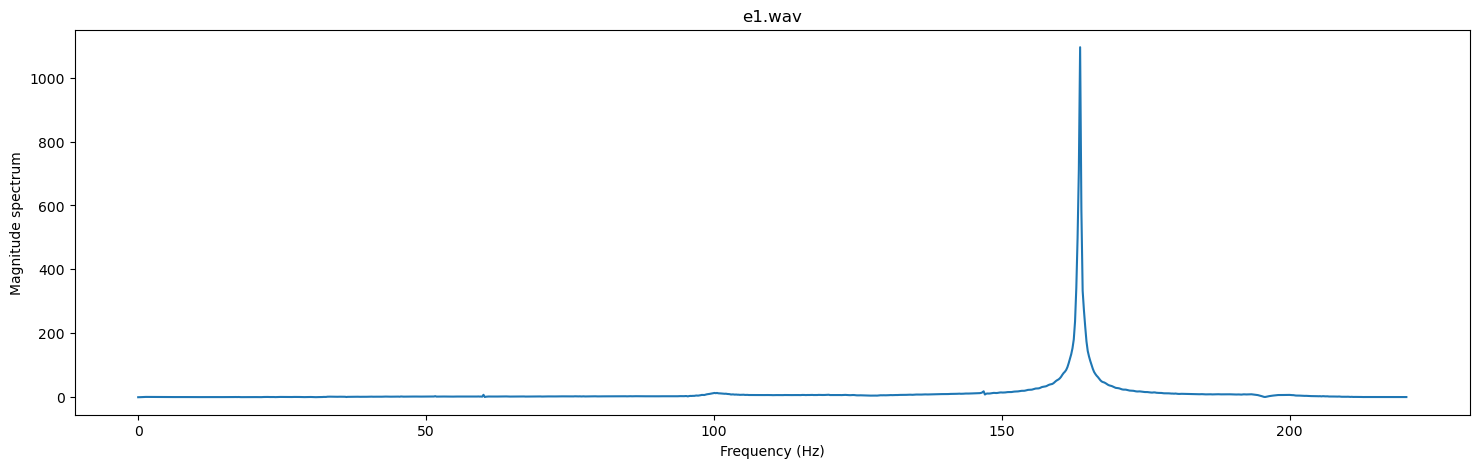

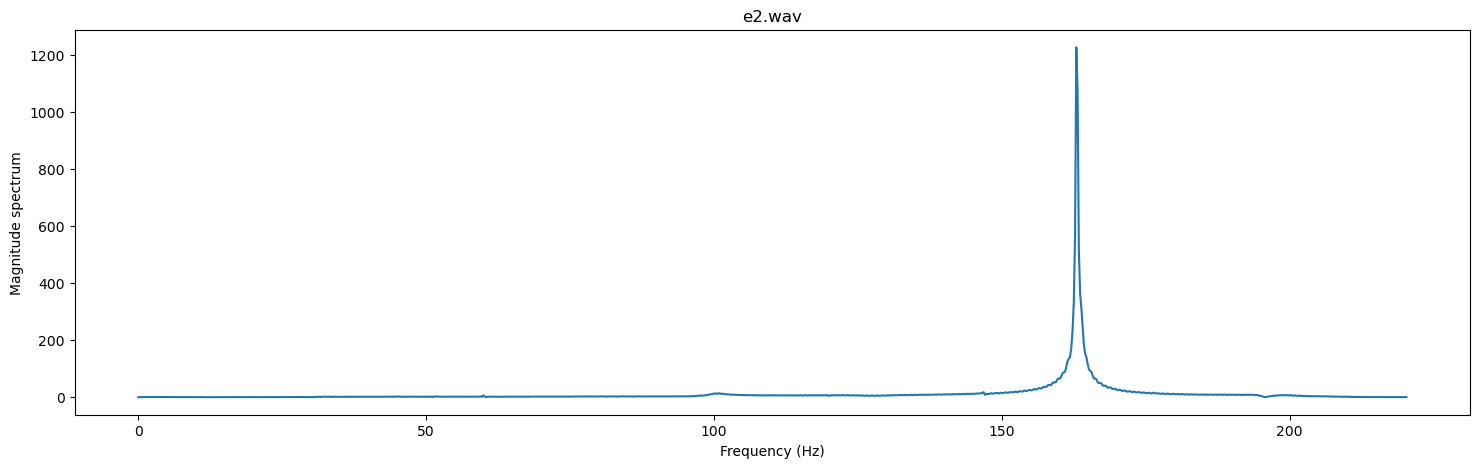

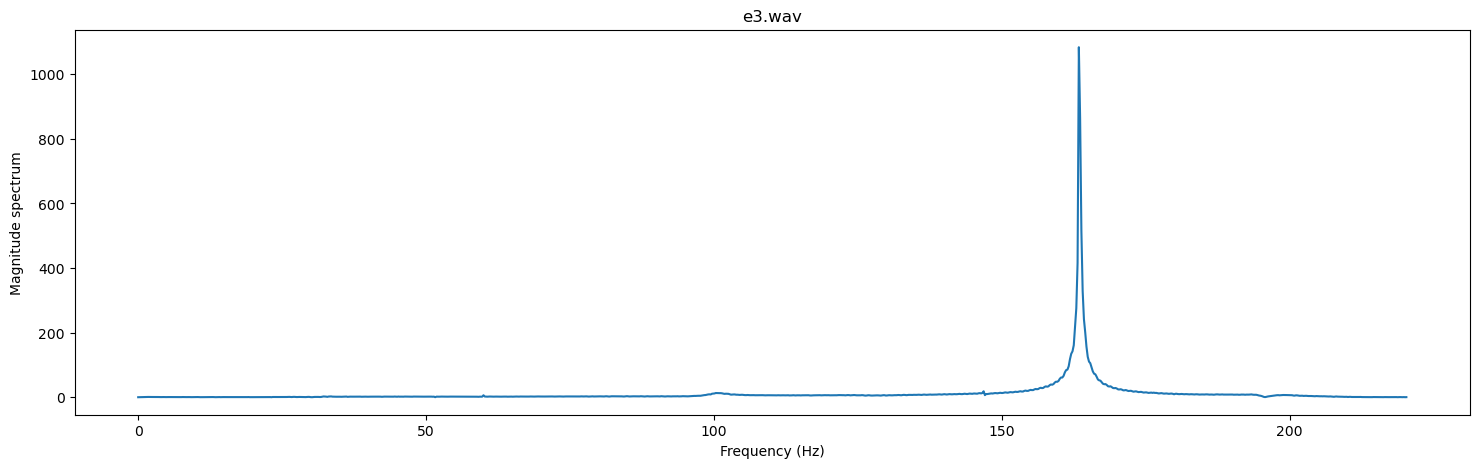

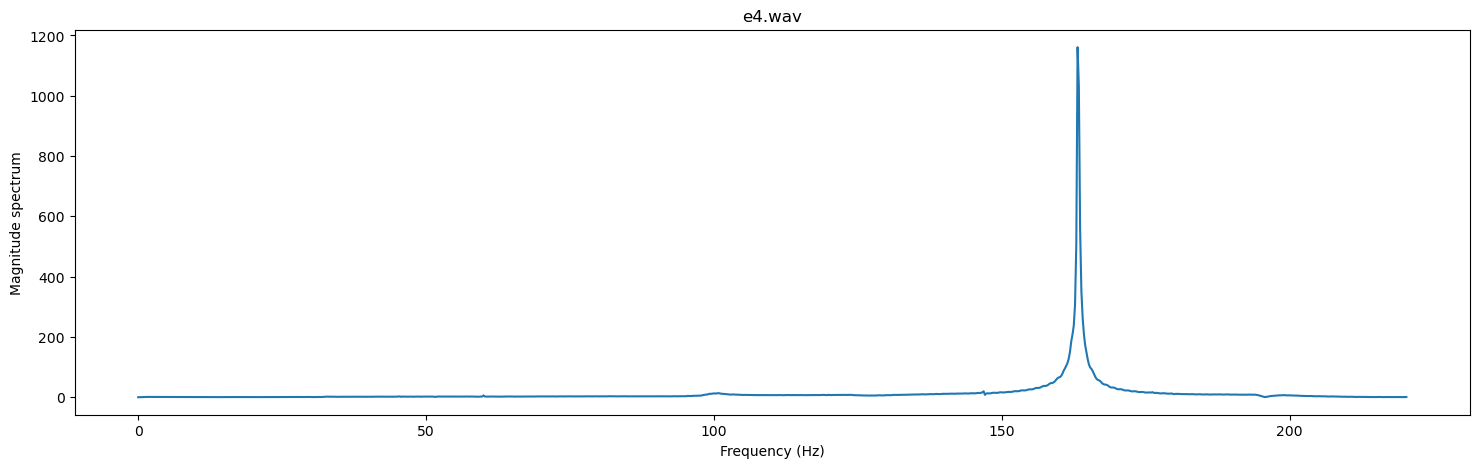

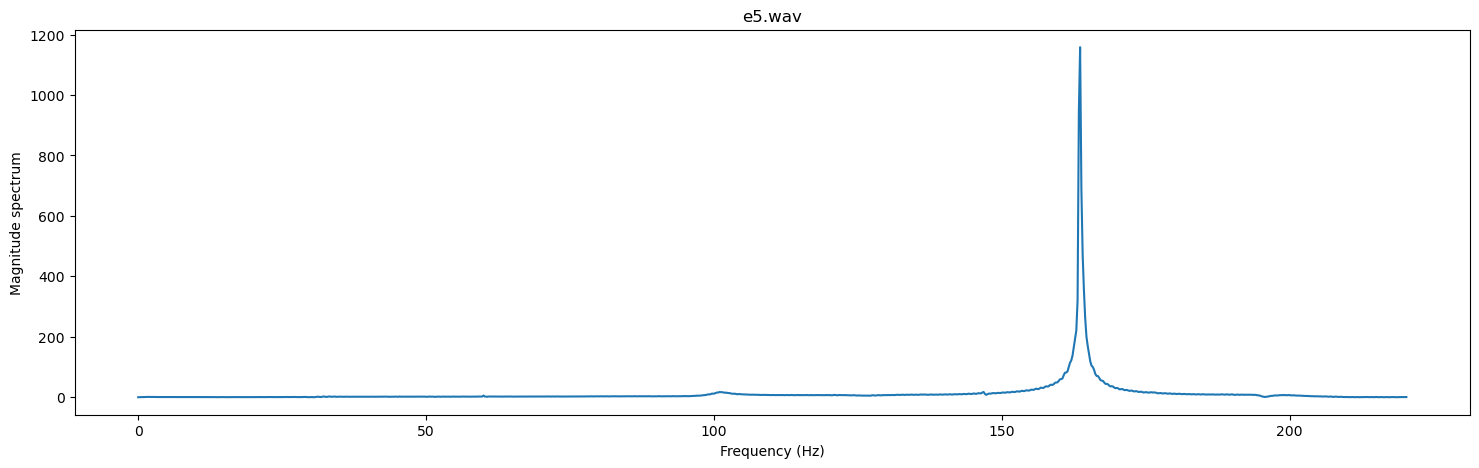

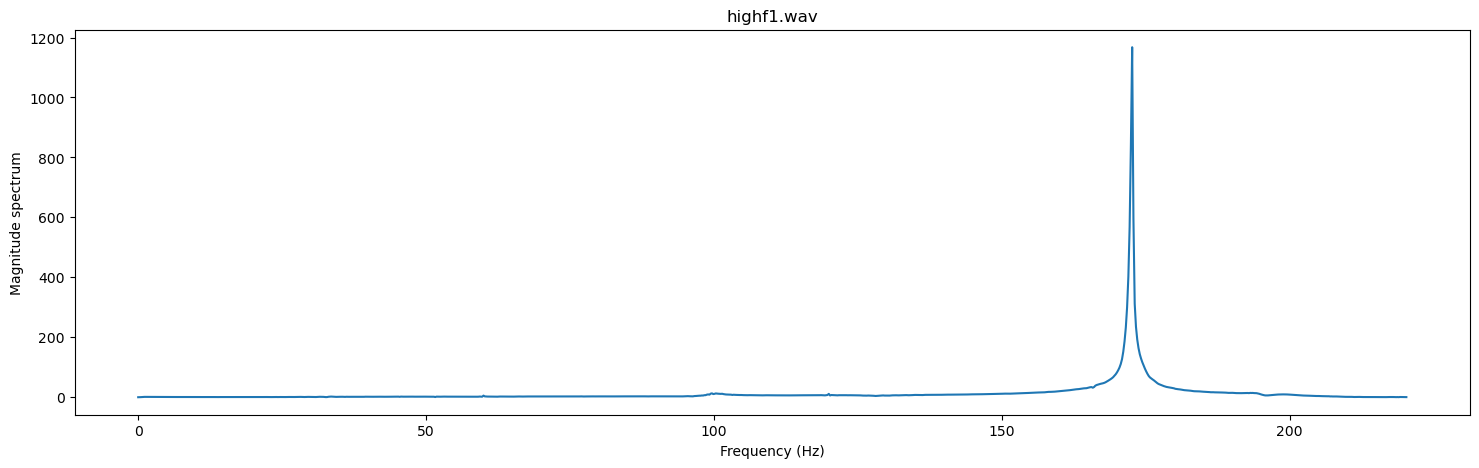

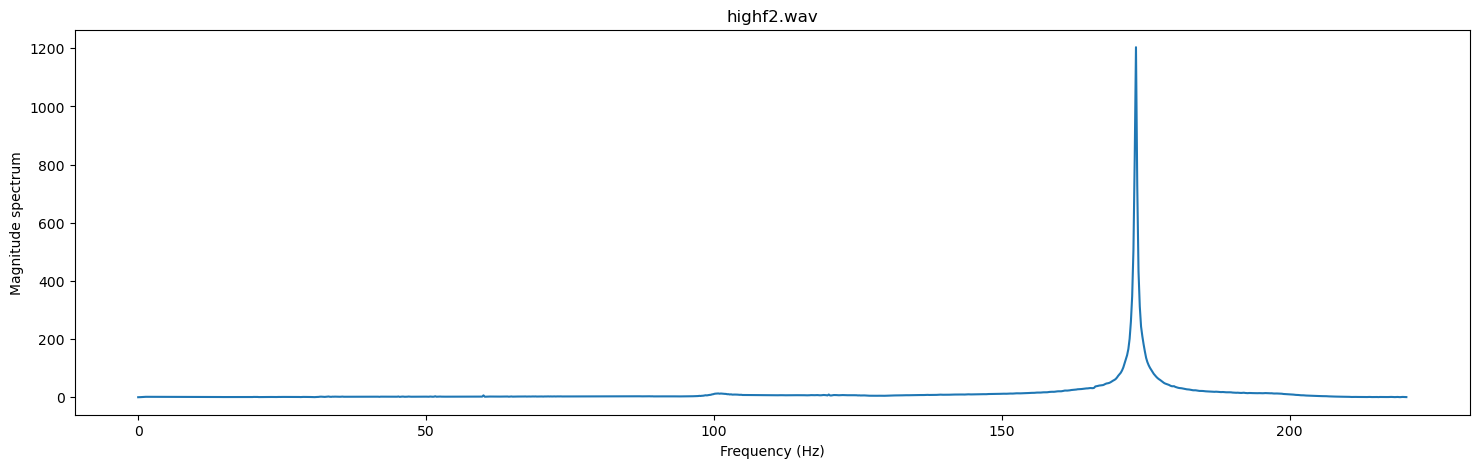

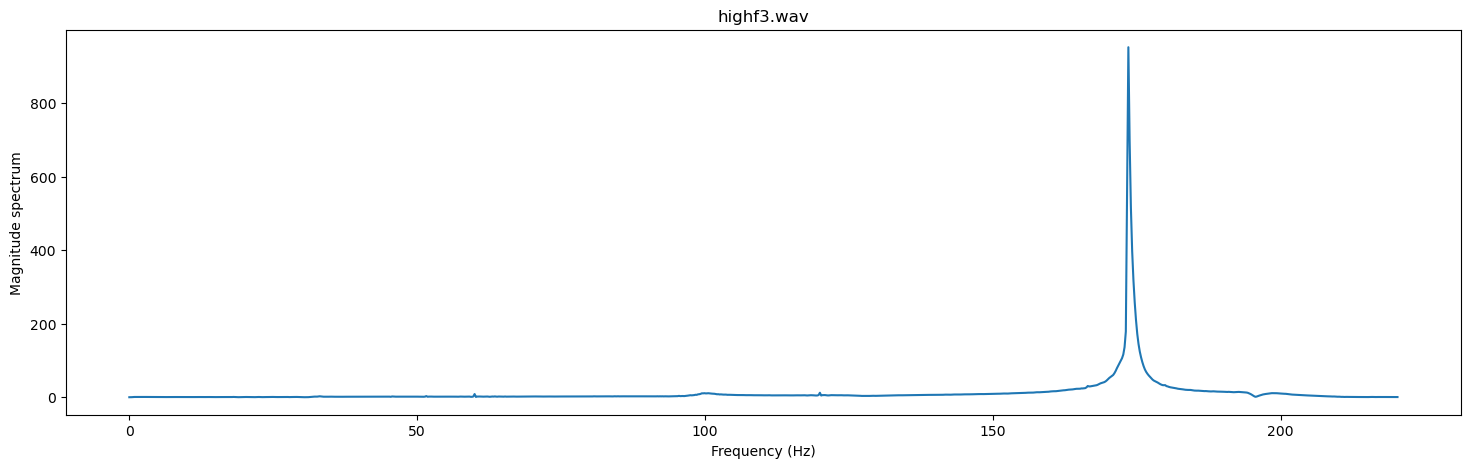

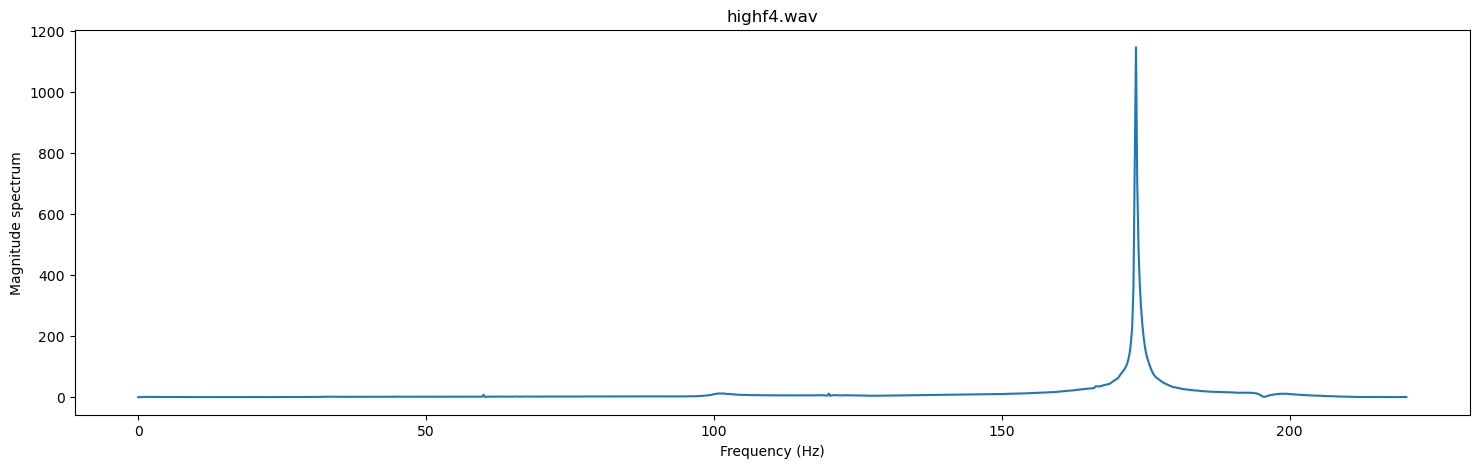

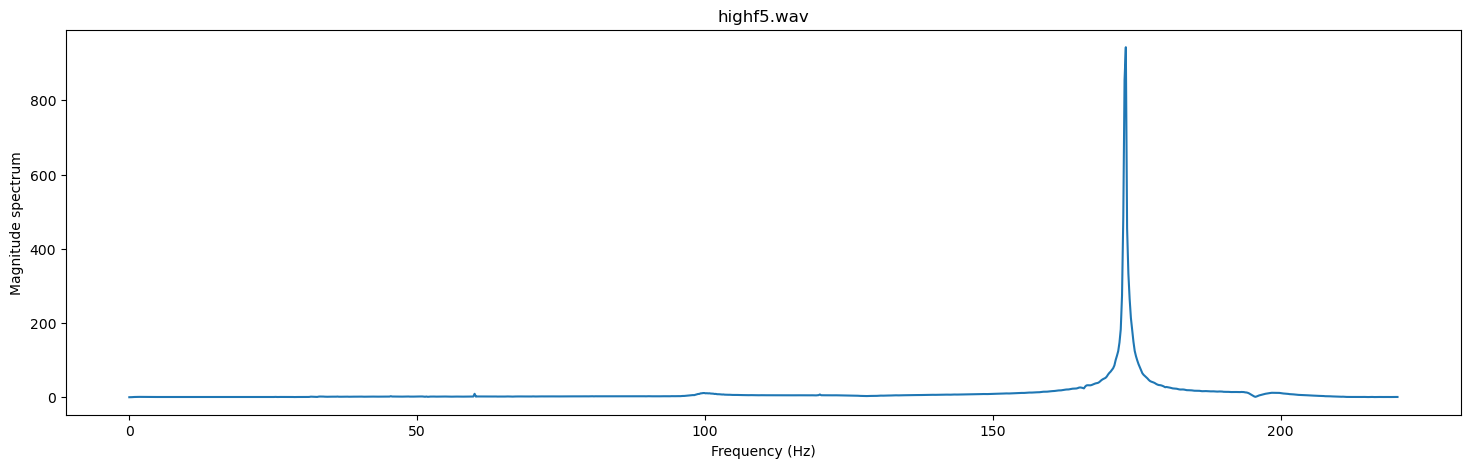

[[86.87786877868778, 86.87786877868778, 86.65736657366574, 86.87786877868778, 86.87786877868778], [92.169921699217, 92.169921699217, 92.39042390423904, 92.169921699217, 91.94941949419494], [97.4619746197462, 97.24147241472416, 97.0209702097021, 97.24147241472416, 97.24147241472416], [103.41553415534156, 103.6360363603636, 103.6360363603636, 103.41553415534156, 103.6360363603636], [109.58959589595896, 109.58959589595896, 109.58959589595896, 109.58959589595896, 109.14859148591486], [115.54315543155433, 115.76365763657637, 115.76365763657637, 115.76365763657637, 115.76365763657637], [122.81972819728198, 122.81972819728198, 122.81972819728198, 122.81972819728198, 122.37872378723787], [130.09630096300964, 130.09630096300964, 130.09630096300964, 130.53730537305373, 130.3168031680317], [137.59337593375935, 138.03438034380343, 137.8138781387814, 137.15237152371523, 137.15237152371523], [145.53145531455314, 145.53145531455314, 145.3109531095311, 146.41346413464134, 145.97245972459726], [153.910

In [4]:
files = [f, fsharp, g, gsharp, a, asharp, b, c, csharp, d, dsharp, e, f2]

frequencies = []
for file in files:
    frequencies.append(plot_ffreq(file, 0.01))

print(frequencies)

In [5]:
mean, stdev = [], []
for note in frequencies:
    mean.append(np.mean(note))
    stdev.append(st.stdev(note))
print(mean)
print(stdev)

[86.83376833768338, 92.169921699217, 97.24147241472416, 103.5478354783548, 109.50139501395014, 115.71955719557195, 122.73152731527315, 130.22860228602286, 137.54927549275493, 145.7519575195752, 154.26334263342636, 163.3480334803348, 173.18243182431826]
[0.09861158392357697, 0.1559186044376784, 0.1559186044376784, 0.12077403167020218, 0.1972231678471603, 0.09861158392357697, 0.1972231678471603, 0.19722316784715554, 0.3944463356943246, 0.44100441004409774, 0.25141119534631323, 0.2874997010664573, 0.3344081511641852]


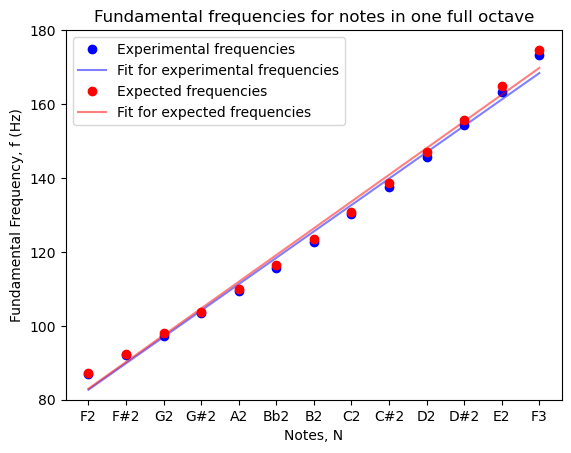

In [6]:
# plot exerimental results
titles = ['F2', 'F#2', 'G2', 'G#2', 'A2', 'Bb2', 'B2', 'C2', 'C#2', 'D2', 'D#2', 'E2', 'F3']
plt.plot(titles, mean, "o", color="blue", label = "Experimental frequencies")
# plt.errorbar(titles, mean, stdev, linestyle='None', markersize=4, ecolor='orange', barsabove=True, elinewidth=4, label = "Experimental frequency")


# fit a straight line to the plot using linregress
x = np.linspace(0, 12, 13)
fit = ss.linregress(x, mean)
plt.plot(x, fit.slope * x + fit.intercept, color="blue", alpha = 0.5, label = "Fit for experimental frequencies")

# plot expected frequency
expected_f = [87.31, 92.5, 98, 103.83, 110, 116.54, 123.47, 130.81, 138.59, 146.93, 155.56, 164.81, 174.61]
plt.plot(x, expected_f, "o", color="red", label = "Expected frequencies")
# plt.plot(x, mean, "o", label = "Experimental results")

# fit a straight line for expected frequency 
expected_fit = ss.linregress(x, expected_f)
plt.plot(x, expected_fit.slope * x + expected_fit.intercept, color="red", alpha=0.5, label = "Fit for expected frequencies")



plt.xlabel("Notes, N"); plt.ylabel("Fundamental Frequency, f (Hz)")
plt.title("Fundamental frequencies for notes in one full octave")
plt.ylim([80,180])
plt.legend()
plt.savefig('f_vs_notes')
plt.show()

In [7]:
# estimate error by chi-square
chi2 = sum(((mean - (fit.slope * x + fit.intercept)) / st.stdev(mean))**2)
print(chi2)

chi2_expected = sum(((expected_f - (expected_fit.slope * x + expected_fit.intercept)) / st.stdev(expected_f))**2)
print(chi2_expected)

0.10418423001104452
0.10831247351168577
